In [1]:
import sys, os, time
from pathlib import Path
# %pdb
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
# os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# %load_ext autoreload
# %autoreload 2

import omnifig as fig
fig.initialize('mnist')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim as O
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook as tqdm
import gym
import json
import shutil
import inspect
import numpy as np
import h5py as hf

%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import seaborn as sns
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
import foundation as fd
from foundation import op
from foundation import models
from foundation import util
# from foundation import sim as SIM
#from foundation.util import replicate, Cloner
from scipy import stats
# fig.initialize()
np.set_printoptions(linewidth=120)

In [2]:
dataset = fig.quick_run('dataset', 'd/3ds')

MissingConfigError: d/3ds

In [7]:
r = 'fleeb@$STOKKUR:/is/ei/fleeb/workspace/chome/trained_nets/'

In [11]:
names = ['3ds_wae1000_e-c12_d-c12_210125-221143', '3ds_wae100_e-c12_d-c12_210125-221143', '3ds_wae10_e-c12_d-c12_210125-045344']

In [12]:
content = ' '.join([f'{r}{n}' for n in names])
print(f'rsync -rvz {content} trained_nets/')

rsync -rvz fleeb@$STOKKUR:/is/ei/fleeb/workspace/chome/trained_nets/3ds_wae1000_e-c12_d-c12_210125-221143 fleeb@$STOKKUR:/is/ei/fleeb/workspace/chome/trained_nets/3ds_wae100_e-c12_d-c12_210125-221143 fleeb@$STOKKUR:/is/ei/fleeb/workspace/chome/trained_nets/3ds_wae10_e-c12_d-c12_210125-045344 trained_nets/


In [2]:
run = fig.quick_run('load-run', path='test-pycharm_210117-215348')

| [Pushed] run._type: 'run'
| CREATING run (type=run)
|  > silent: False (by default)
|  > invisible: False (by default)
|  > path: 'test-pycharm_210117-215348'
|  > [Pushed] novel: False
|  > override: {} (by default)
|  > saveroot --> root: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets' (by default)
Loading Config (for run): C:\Users\anwan\Documents\workspace\trained_nets\test-pycharm_210117-215348\config.yaml
|  > ckpt-num: None (by default)
|  > best: False (by default)
|  > last: True (by default)
|  > [Pushed] dataset._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210117-215348\\ckpt2000'
|  > [Pushed] model._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210117-215348\\ckpt2000'
|  > [Pushed] records._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210117-215348\\ckpt2000'
|  > [Pushed] clock._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_21011

In [3]:
model = run.get_model()
model.to('cuda')
pass

| CREATING .model (type=model)
|  > _model_mod: [] (by default)
|  > .seed: 0
|  > CREATING . (type=simple)
|  >  > CREATING net (type=multilayer)
|  >  >  > final_din --> ..din [list with 3 item/s]
|  >  >  >  > (0): 1
|  >  >  >  > (1): 32
|  >  >  >  > (2): 32
|  >  >  > final_dout --> ..dout: 10
|  >  >  > in_order: True (by default)
|  >  >  > ITERATOR layers [list with 4 item/s]
|  >  >  > [<class 'omnifig.config.ConfigDict'>]
|  >  >  > CREATING 0 (type=conv-layer)
|  >  >  >  > in-shape --> din: (1, 32, 32)
|  >  >  >  > ..channels: 32
|  >  >  >  > out-shape --> dout: None
|  >  >  >  > transpose: None (by default)
|  >  >  >  > ..down: 2
|  >  >  >  > up: None (by default)
|  >  >  >  > pool: None (by default)
|  >  >  >  > kernel_size --> kernel: (3, 3) (by default)
|  >  >  >  > padding: 1 (by default)
|  >  >  >  > dilation: (1, 1) (by default)
|  >  >  >  > stride: (2, 2) (by default)
|  >  >  >  > ..norm: None
|  >  >  >  > ..nonlin: 'elu'
|  >  >  >  > conv_kwargs: {} (

In [1]:
import omnifig

ModuleSpec(name='omnifig', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001FAD4028CC8>, origin='c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig\\__init__.py', submodule_search_locations=['c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig'])


In [2]:
S = omnifig.__spec__

In [3]:
S.submodule_search_locations

['c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig']

In [4]:
omnifig.__path__

['c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig']

In [6]:
omnifig.projects.__spec__

ModuleSpec(name='omnifig.projects', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001FAF35B3188>, origin='c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig\\projects.py')

In [1]:
import omnifig as fig

In [2]:
P = fig.projects

In [3]:
P.__spec__

ModuleSpec(name='omnifig.projects', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001E5C4328BC8>, origin='c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig\\projects\\__init__.py', submodule_search_locations=['c:\\users\\anwan\\onedrive\\khan\\research\\omni-fig\\omnifig\\projects'])

In [4]:
L = P.__spec__.loader
L

In [12]:
from tabulate import tabulate

In [22]:
print(tabulate([['*133462345.3',]], ))

------------
*133462345.3
------------


In [25]:
[3,4,5].index(7)

ValueError: 7 is not in list

In [11]:
__import__('omnifig.projects.sae')

ModuleNotFoundError: No module named 'omnifig.projects.sae'

In [5]:
from omnifig.projects import sae

ImportError: cannot import name 'sae' from 'omnifig.projects' (c:\users\anwan\onedrive\khan\research\omni-fig\omnifig\projects\__init__.py)

In [7]:
L.create_module?

In [7]:
import foundation

In [8]:
foundation.__spec__

ModuleSpec(name='foundation', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001F80DA6B908>, origin='C:\\Users\\anwan\\OneDrive\\Khan\\research\\foundation\\foundation\\__init__.py', submodule_search_locations=['C:\\Users\\anwan\\OneDrive\\Khan\\research\\foundation\\foundation'])

In [ ]:
foundation.__spec__.

In [ ]:
# https://docs.python.org/3/library/importlib.html#importlib.util.module_from_spec
import importlib.util
import sys

def import_module(name, package=None):
    """An approximate implementation of import."""
    absolute_name = importlib.util.resolve_name(name, package)
    try:
        return sys.modules[absolute_name]
    except KeyError:
        pass

    path = None
    if '.' in absolute_name:
        parent_name, _, child_name = absolute_name.rpartition('.')
        parent_module = import_module(parent_name)
        path = parent_module.__spec__.submodule_search_locations
    for finder in sys.meta_path:
        spec = finder.find_spec(absolute_name, path)
        if spec is not None:
            break
    else:
        msg = f'No module named {absolute_name!r}'
        raise ModuleNotFoundError(msg, name=absolute_name)
    module = importlib.util.module_from_spec(spec)
    sys.modules[absolute_name] = module
    spec.loader.exec_module(module)
    if path is not None:
        setattr(parent_module, child_name, module)
    return module

In [1]:
import sys, os

In [2]:
sys.meta_path

[_frozen_importlib.BuiltinImporter,
 _frozen_importlib.FrozenImporter,
 _frozen_importlib_external.PathFinder,

In [3]:
os.getcwd()

'C:\\Users\\anwan\\OneDrive\\Khan\\research\\foundation'

In [4]:
absolute_name = 'sae'
path = os.getcwd()

In [6]:
for finder in sys.meta_path:
    spec = finder.find_spec(absolute_name, path)
    print(spec)
#         if spec is not None:
#             break

None
None
None


AttributeError: '_SixMetaPathImporter' object has no attribute 'find_spec'

In [ ]:
sys.path_hooks

In [4]:
run.batch = None
batch = run.get_batch()

| CREATING ...dataset (type=dataset)
|  > [Pushed] dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: False
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1666666
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> ident --> name: 'mnist'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > mode-aliases [dict with 1 item/s]
|  >  > (eval): 'val'
|  > .seed: 0
|  > .din [list with 3 item/s]
|  >  > (0): 1
|  >  > (1): 32
|  >  > (2): 32
|  > .dout: 10
|  > mode: 'train'
|  > device: 'cpu'
|  > pin_memory: True (by default)
|  > epoch_seed --> .seed: 0
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/mnist)
|  >  > dataroot: 'C:\\Users\\anwan\\Documents\\worksp

C:\Users\anwan\Anaconda3\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [5]:
X, Y = batch.to('cuda')
X.shape, Y.shape

(torch.Size([128, 1, 32, 32]), torch.Size([128]))

In [6]:
with torch.no_grad():
    pred = model(X)
pred.shape

torch.Size([128, 10])

In [7]:
pred[0]

tensor([-3.1703, -1.2786, -2.1407,  1.7792, -3.0209,  0.2651, -1.7280, -2.8799,
         8.3636, -1.3957], device='cuda:0')

In [8]:
data = run.get_results('eval')

In [9]:
data.keys()

odict_keys(['device', 'x', 'y', 'pred', 'loss', 'batch'])

In [13]:
import torch
from torch import nn

torch.Size([2, 4, 4])

In [2]:
from torchvision import transforms as tfms

In [3]:
import sys, os
from pathlib import Path

In [13]:
N = 100
X = fig.quick_create('scheduler/cos', value=2, freq=10, limit=N, end_val=1, include_zero=True)
X

| trig: 'cos' (by default)
| half-periods: 1 (by default)
| value: 2
| as-int: True (by default)
| _ident --> __origin_key: None (by default)
| include_zero: True
| freq: 10
| clock: None (by default)
| start: 0 (by default)
| stop: None (by default)
| end_val: 1
| limit: 100
| skew: 0 (by default)
| constrain-progress: False (by default)


int[0::10](
        end_val: 1,
)

In [14]:
xy = [(i, X.activate(i)) for i in range(0,N+1) if X.check(i)]
len(xy)

11

<IPython.core.display.Javascript object>


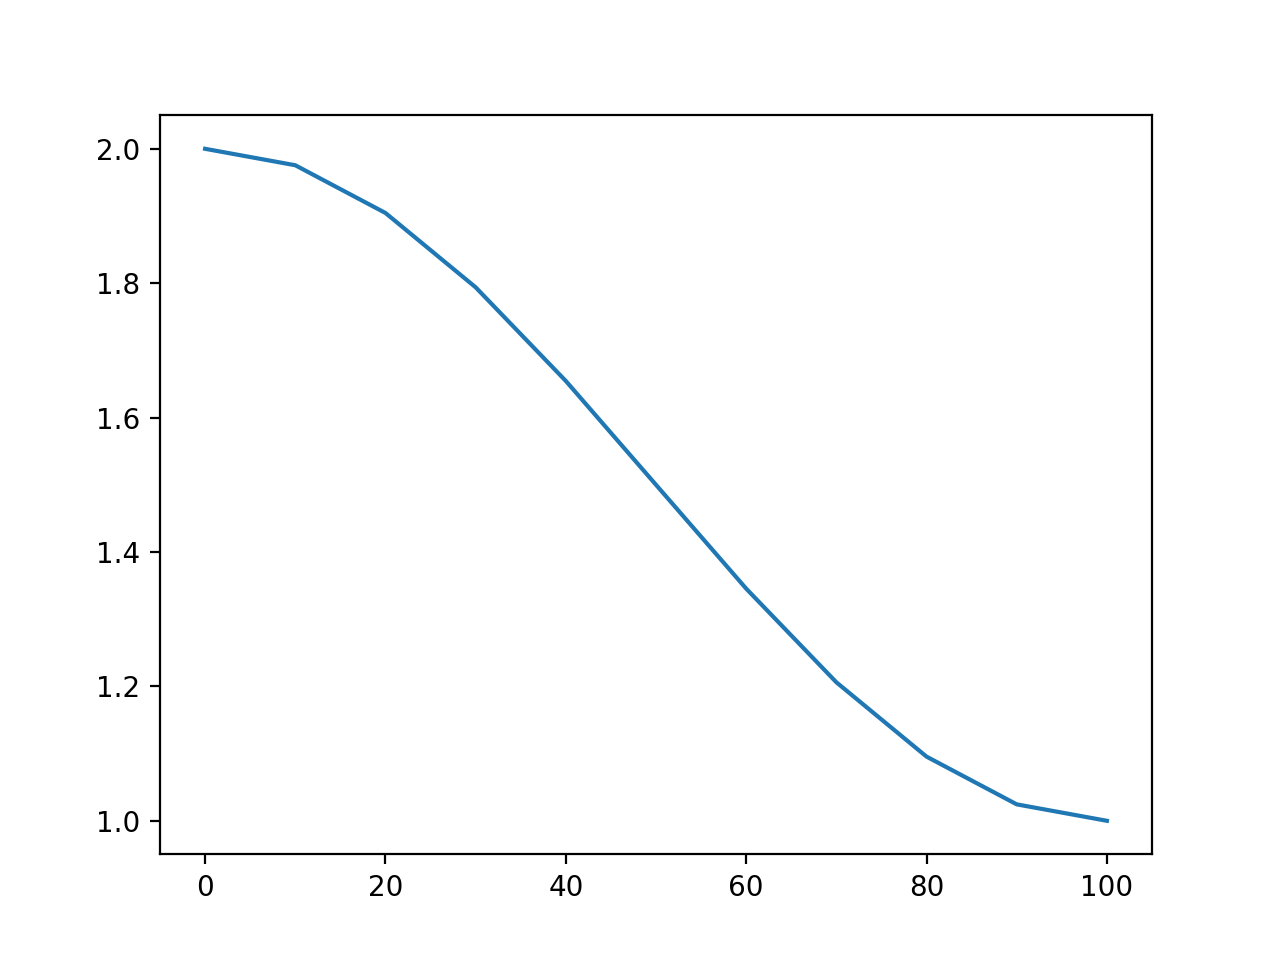

In [15]:
plt.figure()
plt.plot(*zip(*xy))
pass

In [12]:
import torch
%matplotlib notebook
from matplotlib import pyplot as plt

In [28]:
ro = -0.5

In [29]:
x = torch.linspace(0,1,1000)

In [30]:
z = 2*x-1
y = z.abs()**(3**ro) * z.sgn() * 0.5 + 0.5

<IPython.core.display.Javascript object>


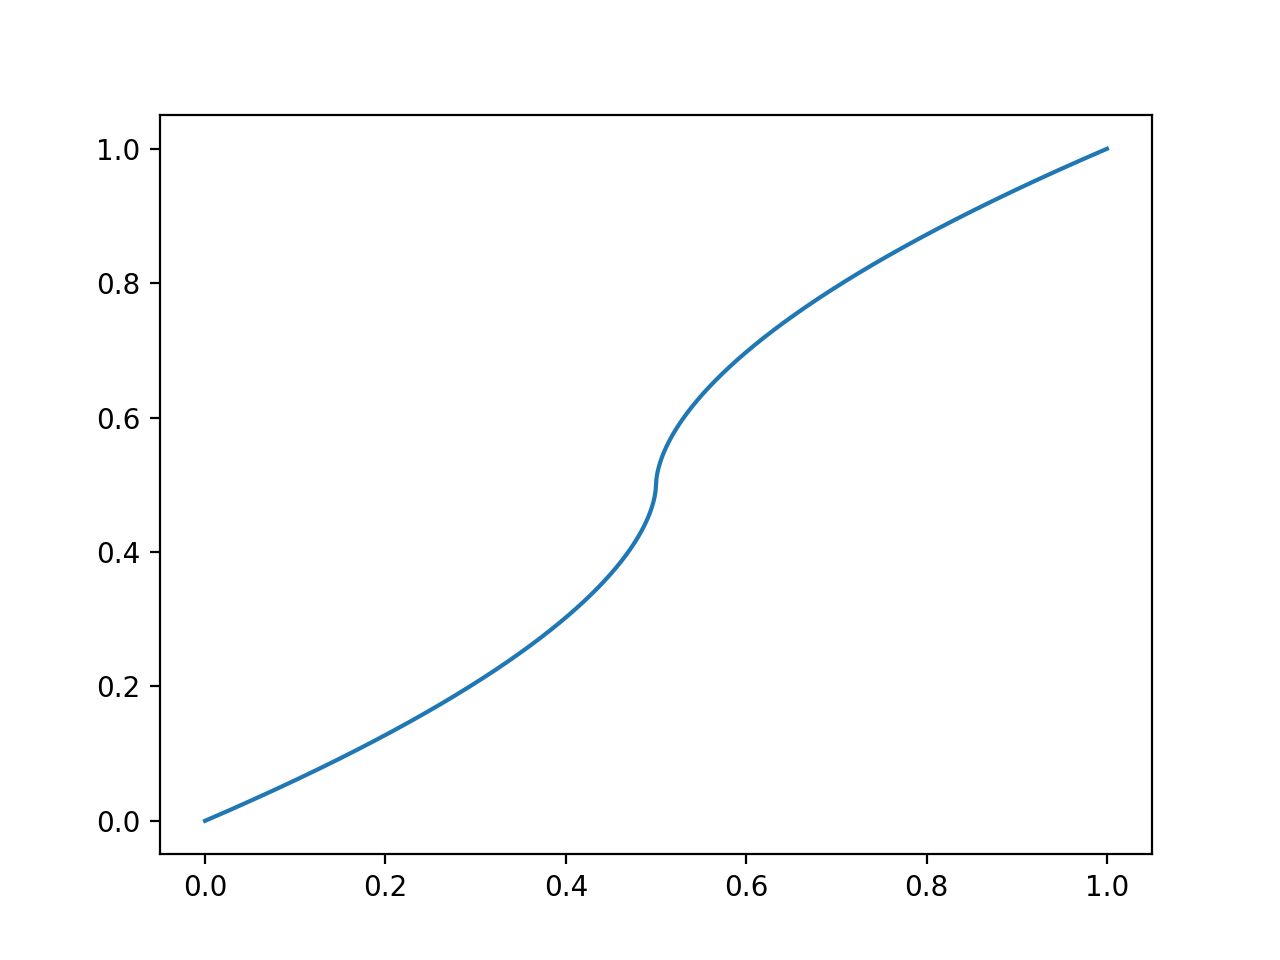

In [31]:
plt.plot(x,y)

In [3]:
path = Path(r'C:\Users\anwan\Documents\workspace\legacy_trained_nets')
path2 = Path(r'D:\structure_by_architecture_models\completed')

In [11]:
s1 = set(x.stem for x in path.glob('*'))
s2 = set(x.stem for x in path2.glob('*'))
len(s1), len(s2)

(246, 245)

In [12]:
[x for x in s1 if x not in s2]

['test-pycharm_200529-194220']

In [1]:
from collections import OrderedDict

In [3]:
x = {'a':1, 'b':2}

In [4]:
y = OrderedDict(x)
del x['a']
x,y

({'b': 2}, OrderedDict([('a', 1), ('b', 2)]))

In [5]:
class N(int):
    def __init__(self, A):
        self.val = A+1
        print(f'did init: {self.val}')

In [6]:
x = N(1)

did init: 2


In [8]:
from wrapt import ObjectProxy

In [47]:
class Changable(ObjectProxy):
    def __init__(self, val):
#         super().__init__(val)
        self.set(val)
    
    def set(self, val):
        self.__wrapped__ = val

In [48]:
a = Changable(1)

In [56]:
1 == 1 == 1

True

In [49]:
a + 1

2

In [52]:
a + 1

-9

In [51]:
a.set(-10)

In [34]:
print(a)

-9


In [28]:

def print_me(cls, a=None):
    print(cls.__name__, 'has been declared', a)
    return cls

In [35]:


@print_me
class TestClass():
    pass

TestClass has been declared 100


In [33]:
a += 1

In [35]:
type(a)

__main__.Changable

In [3]:
# bottle.h5	carpet.h5	leather.h5	screw.h5	transistor.h5
# cable.h5	grid.h5		metal_nut.h5	tile.h5		wood.h5
# capsule.h5	hazelnut.h5	pill.h5		toothbrush.h5	zipper.h5

In [4]:
cats = ['bottle', 'carpet', 'leather', 'screw', 'transistor', 'cable', 'grid', 
        'metal_nut', 'tile', 'wood', 'capsule', 'hazelnut', 'pill','toothbrush', 'zipper']
greys = ['screw', 'grid', 'zipper']

running test script in foundation
| [Pushed] clock._type: 'clock'
| [Pushed] clock._mod.clock-stats: 1
| [Pushed] scheduler._type: 'scheduler/exp'
| [Pushed] scheduler.limit: 100
| [Pushed] scheduler.min_lr: 0.1
| [Pushed] scheduler.progress-power: 2
| CREATING clock (type=clock) (mod={'clock-stats': 1})
|  > CREATING stats (type=stats)
|  >  > names: () (by default)
|  >  > tau: None (by default)
|  >  > _stats: {} (by default)
|  > _reg_stats: True (by default)
|  > records: None (by default)
| CREATING scheduler (type=scheduler/exp)
|  > include-zero: False (by default)
|  > freq: None (by default)
|  > start: 0 (by default)
|  > stop: None (by default)
|  > min_lr: 0.1
|  > limit: 100
|  > progress-power: 2


<IPython.core.display.Javascript object>


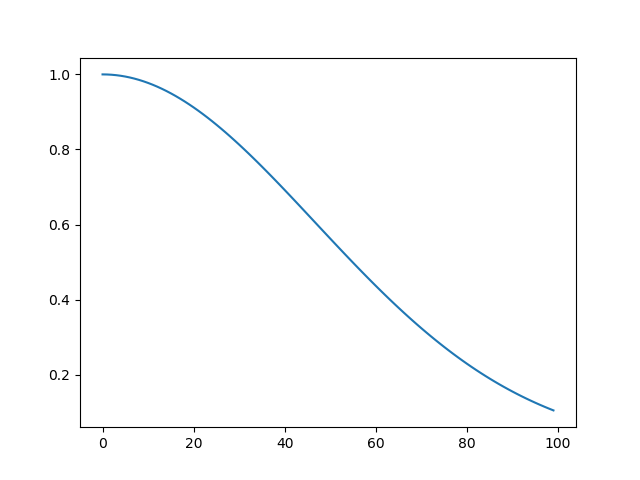

In [7]:
print('running test script in foundation')

A = fig.get_config()

A.push('clock._type', 'clock')
A.push('clock._mod.clock-stats', 1)

A.push('scheduler._type', 'scheduler/exp')
# A.push('scheduler._type', 'scheduler/cos')
# A.push('scheduler._type', 'scheduler/lin')
# A.push('scheduler.freq', 10)
# A.push('scheduler.num-steps', 100)
A.push('scheduler.limit', 100)
# A.push('scheduler.gamma', 0.5)
A.push('scheduler.min_lr', 0.1)
# A.push('scheduler._mod.alert/reg', 1)
A.push('scheduler.power', 2)


clock = A.pull('clock')

sch = A.pull('scheduler')

clock.register_alert('scheduler', sch)

model = nn.Linear(10, 4)
optim = util.get_optimizer('adam', model.parameters(), lr=1)

sch.include_optim(optim)

lrs = []

for _ in range(100):
    clock.tick()
    lrs.append(optim.param_groups[0]['lr'])

plt.plot(lrs)

pass

In [8]:
from torch import optim as O

In [10]:
optim = O.SGD([torch.tensor(0)], lr=1e-3, weight_decay=0, momentum=0,)

In [11]:
optim

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [5]:
A = fig.get_config()

In [34]:
A.push('clock._type', 'clock')
A.push('clock._mod.clock-stats', 1)

A.push('scheduler._type', 'scheduler/step')
A.push('scheduler.freq', 10)
A.push('scheduler.gamma', 0.5)
A.push('scheduler._mod.alert/reg', 1)
pass

| [Pushed] clock._type: 'clock'
| [Pushed] clock._mod.clock-stats: 1
| [Pushed] scheduler._type: 'scheduler/step'
| [Pushed] scheduler.freq: 10
| [Pushed] scheduler.gamma: 0.5


AttributeError: 'str' object has no attribute '_set_prefix'

In [27]:
clock = A.pull('clock')

| CREATING clock (type=clock)


In [28]:
# sch = fig.quick_create('scheduler/cos', limit=100, min_lr=0.1)
# sch = fig.quick_create('scheduler/step', freq=10, gamma=0.5)
sch = A.pull('scheduler')

| CREATING scheduler (type=scheduler/step) (mod=alert/reg)
|  > ident --> name: None (by default)
|  > freq: 10
|  > start: 0 (by default)
|  > stop: None (by default)
|  > min_lr: None (by default)
|  > factor --> gamma: 0.5
|  > REUSING .clock (type=clock): id=0x27f730eb048


In [29]:
model = nn.Linear(10,4)
optim = util.get_optimizer('adam', model.parameters(), lr=1)
optim

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1
    weight_decay: 0
)

In [30]:
sch.include_optim(optim)

In [31]:
sch._initial_lrs

[1]

In [32]:
lrs = []
for i in range(100):
    lrs.append(sch.activate(i))
len(lrs)

100

<IPython.core.display.Javascript object>


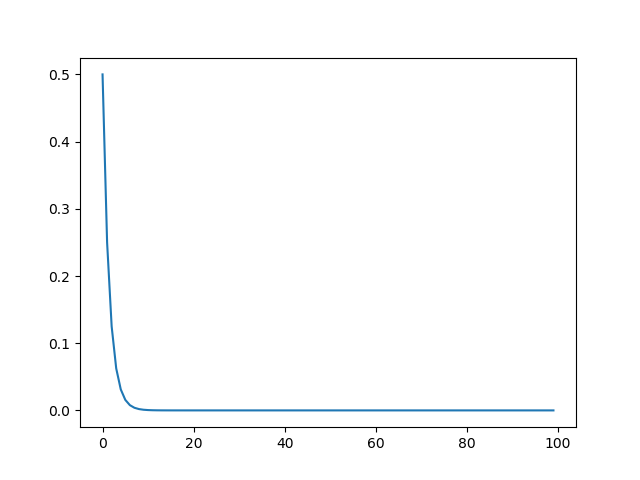

In [33]:
plt.plot(lrs)
pass

In [7]:
C = fig.quick_create('clock')
C

| name: 'test' (by default)
test


In [8]:
id(C)

2971849061128

In [9]:
C2 = fig.quick_create('clock')

In [10]:
id(C2)

2971849061128

In [14]:
import goslate
gs = goslate.Goslate()

In [16]:
print(gs.translate('hello world', 'de'))

Hallo Welt


In [17]:
print(gs.detect('hello world'))

HTTPError: HTTP Error 429: Too Many Requests

In [21]:


wyw_text = '季姬寂，集鸡，鸡即棘鸡。棘鸡饥叽，季姬及箕稷济鸡。'
chs_text = '季姬感到寂寞，罗集了一些鸡来养，鸡是那种出自荆棘丛中的野鸡。野鸡饿了唧唧叫，季姬就拿竹箕中的谷物喂鸡。'

# # input languages
# print(ts.deepl(wyw_text)) # default: from_language='auto', to_language='en'

## output language_map
print(ts._deepl.language_map)

# professional field
print(ts.alibaba(wyw_text, professional_field='general')) # ("general","message","offer")
print(ts.baidu(wyw_text, professional_field='common')) # ('common','medicine','electronics','mechanics')

# property
# rs = [ts.tencent(x) for x in [wyw_text, chs_text]]
# print(ts._tencent.query_count)
# print(dir(ts._tencent))

# help
# help(ts.deepl)

{'ja': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'pt': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'es': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'en': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'de': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'it': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'ru': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'nl': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'fr': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'zh': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}, 'pl': {'ja', 'pt', 'es', 'en', 'de', 'it', 'ru', 'nl', 'fr', 'zh', 'pl'}}
Ji Ji Ji, the chicken is the thorn chicken. The Thorn chicken is hungry, Ji Ji and Ji Ji Ji Ji.
Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji Ji

IndexError: list index out of range

In [22]:

# requests
print(ts.youdao(wyw_text, sleep_seconds=5, proxies={}, use_cache=True))

# host service
print(ts.google(wyw_text, if_use_cn_host=True))
print(ts.bing(wyw_text, if_use_cn_host=False))

# detail result
print(ts.sogou(wyw_text, is_detail_result=True))


Ji Ji lonely, set chicken, chicken namely thorn chicken.Ji Ji hungry chicken ji Ji ji ji ji ji ji ji ji ji chicken.
Ji Jiji, collect chickens, chickens are spiny chickens. The thorn chicken is hungry, Ji Ji and Ji Ji Ji chicken.
Ji Ji is silent, set chicken, chicken is ratchet chicken. Ratchet chicken hunger, Jiji and Yuji chicken.
{'status': 0, 'info': 'success', 'zly': 'zly', 'node': '1', 'data': {'sgtkn': '89ADC39F27BE3A42FAFE4EDDBA9541D1FB86D66D5FC215D3', 'detect': {'detect': 'zh-CHS', 'language': '中文', 'errorCode': '0', 'id': 'a1d24c23-c915-964e-bb76-749a691c535b', 'text': '季姬寂，集鸡，鸡即棘鸡。棘鸡饥叽，季姬及箕稷济鸡。', 'zly': 'zly'}, 'common_dict': {}, 'bilingual': {'code': 0, 'data': {'list': []}}, 'keyword_dict': [], 'translate': {'zly': 'zly', 'errorCode': '0', 'qc_type': '1', 'index': 'content0', 'from': 'zh-CHS', 'source': 'sogou', 'text': '季姬寂，集鸡，鸡即棘鸡。棘鸡饥叽，季姬及箕稷济鸡。', 'to': 'en', 'id': 'a1d24c23-c915-964e-bb76-749a691c535b', 'dit': 'Ji Ji Ji Ji, who gathers chickens, is a chicken with spines. 

In [24]:
ts.google('hallo welt', if_use_cn_host=True)

'Hello World'

In [48]:
ts.deepl('hallo welt')

HTTPError: 429 Client Error: Too many Requests for url: https://www2.deepl.com/jsonrpc

In [47]:
print(ts._google.language_map['en'])

['sq', 'ar', 'am', 'az', 'ga', 'et', 'or', 'eu', 'be', 'bg', 'is', 'pl', 'bs', 'fa', 'af', 'tt', 'da', 'de', 'ru', 'fr', 'tl', 'fi', 'fy', 'km', 'ka', 'gu', 'kk', 'ht', 'ko', 'ha', 'nl', 'ky', 'gl', 'ca', 'cs', 'kn', 'co', 'hr', 'ku', 'la', 'lv', 'lo', 'lt', 'lb', 'rw', 'ro', 'mg', 'mt', 'mr', 'ml', 'ms', 'mk', 'mi', 'mn', 'bn', 'my', 'hmn', 'xh', 'zu', 'ne', 'no', 'pa', 'pt', 'ps', 'ny', 'ja', 'sv', 'sm', 'sr', 'st', 'si', 'eo', 'sk', 'sl', 'sw', 'gd', 'ceb', 'so', 'tg', 'te', 'ta', 'th', 'tr', 'tk', 'cy', 'ug', 'ur', 'uk', 'uz', 'es', 'iw', 'el', 'haw', 'sd', 'hu', 'sn', 'hy', 'ig', 'it', 'yi', 'hi', 'su', 'id', 'jw', 'en', 'yo', 'vi', 'zh-CN']


In [49]:
import translators as ts
# import goslate

In [51]:
text = 'سيف بن زايد يُطلق مبادرة "أقدر للمدارس الآمنة رقمياً" - Sharjah24'

In [52]:
print(ts.sogou(text, is_detail_result=False))

Saif bin Zayed launches 'I appreciate safe schools digitally' initiative - Sharjah24


In [54]:
print(ts.bing(text, if_use_cn_host=False, is_detail_result=False))

Saif bin Zayed launches 'I appreciate safe schools digitally' initiative - Sharjah24


In [8]:
ts.youdao(text, sleep_seconds=5, proxies={})

'你好世界'

In [37]:
ts.google(text, if_use_cn_host=True, is_detail_result=False)

'WTO postpones decision on new director-general candidate_World News_News Center-Shenyang Net'

In [41]:
ts.sogou?

In [39]:
ts.bing(text, if_use_cn_host=False, is_detail_result=False)

'WTO postpones decision on new Director-General candidates - International News - Shenyang Network'

In [11]:
ts.bing?

In [14]:
from langdetect import detect

In [35]:
text = 'América Latina y el mundo rechazan atentado contra Luis Arce - teleSUR TV'
text = 'В Україні рекордні 10,7 тисяч випадків коронавірусу за добу - Українська правда'
text = '記者曹悅華／台北即時報導'
text = '華盛頓7日綜合外電報導'
text = 'İzmir’in Foça ilçesinde eski çöp döküm alanında çıkan, makilik ve zeytinlik alana sıçrayan yangın, itfaiye ekiplerinin çalışması sonucu kontrol altına alındı. Yangında 3 hektar alan zarar gördü.'
text = 'นายฉาย บุนนาค ประธานกรรมการบริหาร บริษัท เนชั่น มัลติมีเดีย กรุ๊ป จำกัด (มหาชน) หรือ NMG  โพสต์ข้อความผ่านเฟซบุ๊ก โดยมีรายละเอียดดังนี้'
text = 'Obekvämt och impopulärt – men nödvändigt. Så beskriver den 30-åriga borgmästaren Léonore Moncond’huy beslutet att stänga flygplatsen i sin västfranska stad. – Man måste våga ställa de svåra frågorna för att verkligen kämpa mot klimatförändringarna.'
text = 'Репер Kинг Вон из Чикага један је од тројице убијених у пуцњави испред ноћног клуба у Атланти, у којој су рањене још три особе, саопштили су државни истражитељи.'
text = 'Leacul pentru COVID a stat mereu sub ochii noștri. Noi îl folosim zilnic - EVENIMENTUL ZILEI'
text = 'Açores. Rio acusa PS de mentir sobre acordos com Chega - Notícias ao Minuto'
text = 'To rząd jest odpowiedzialny za wywołanie konfliktu wokół aborcji. SONDAŻ - Wiadomosci Gazeta.pl'
text = 'Le gouvernement appelle à l’activation de la préférence nationale pour un « Made in Morocco » performant - Hespress Français'
text = 'Populārākie vārdi – Mārtiņš un Nellija - bnn.lv'
text = 'トランプ大統領の首席補佐官が感染…マスク着用に消極的 - 読売新聞'
text = 'בחירות ארה"ב: כך תשפיעה זכייתו האפשרית של ביידן על איראן - מעריב'
text = 'Csak jövőre jelenik meg a The Medium (PC, Xbox Series X/S) - Gamepod'
text = 'Πλημμύρισε το… Οροπέδιο Λασιθίου – Προβλήματα στο οδικό δίκτυο - Zougla'
text = 'تعرف على طقس الـ3 أيام المقبلة.. أمطار مختلفة الشدة غزيرة على السواحل الشمالية - Al Masry Al Youm - المصري اليوم'
text = 'Trumpovi stoupenci dál protestují, někteří z Bidenových už slaví - České noviny'
text = '世贸组织推迟就新总干事人选做出决定_国际新闻_新闻中心 - 沈阳网'

detect(text)

'zh-cn'

'es'

In [7]:
class T(nn.Linear):
    def __init__(self, features, bias=True):
        super().__init__(features, features, bias=bias)
        self.w1 = self.weight
        super().__init__(features, features, bias=False)
        self.w2 = self.weight

In [8]:
x = T(10)

In [9]:
x.w1

AttributeError: 'T' object has no attribute 'w1'

[autoreload of foundation.models.layers failed: Traceback (most recent call last):
  File "C:\Users\anwan\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\anwan\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\anwan\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\anwan\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\anwan\Nextcloud\Khan\research\fou

T(in_features=10, out_features=10, bias=False)

In [13]:
np.arange(4)*1447/4

array([   0.  ,  361.75,  723.5 , 1085.25])

In [85]:
N, D = 4, 12

In [86]:
X = torch.randn(N, D)
Y = torch.randn(N, D)
# x = torch.eye(N)

In [87]:
model = models.Invertible(D)
optim = util.get_optimizer('adam',model.parameters())
model, optim

TypeError: __init__() takes 1 positional argument but 3 were given

In [88]:
for _ in range(100):
    y = model(X)
    x = model.inverse(Y)
    loss = F.mse_loss(x,X) + F.mse_loss(y,Y)
    print(loss.item(), (X-model.inverse(y)).abs().sum().item())
    optim.zero_grad()
    loss.backward()
    optim.step()

3.2209529876708984 0.00014106929302215576
3.1734015941619873 0.0001272745430469513
3.085071563720703 0.00019715353846549988
2.9747211933135986 0.00017586350440979004
2.857837200164795 0.00023977458477020264
2.742485523223877 0.00012447312474250793
2.630983829498291 0.0003920160233974457
2.5238986015319824 0.0004723742604255676
2.422196865081787 0.0002823173999786377
2.3268799781799316 0.004295662045478821
2.7657647132873535 0.0014792419970035553
2.655726909637451 0.0004141665995121002
2.533489465713501 0.000281699001789093
2.416341781616211 0.0002075284719467163
2.3122682571411133 0.00015543773770332336
2.201953411102295 0.00025096163153648376
2.094158172607422 7.071346044540405e-05
2.01472806930542 0.00018985942006111145
1.9255239963531494 9.641796350479126e-05
1.8616199493408203 0.00016733258962631226
1.7987730503082275 0.00018333643674850464
1.739668369293213 7.9374760389328e-05
1.6918838024139404 7.599219679832458e-05
1.63559091091156 0.00017334520816802979
1.5958259105682373 8.716

tensor(3.9484, grad_fn=<AddBackward0>)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [15]:
x.copy_(torch.tensor(1))

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [5]:
# y = util.angl2cart(x)
y = util.orthogonalize(x)
y.shape, torch.det(y)

(torch.Size([32, 32]), tensor(1.0000))

<IPython.core.display.Javascript object>


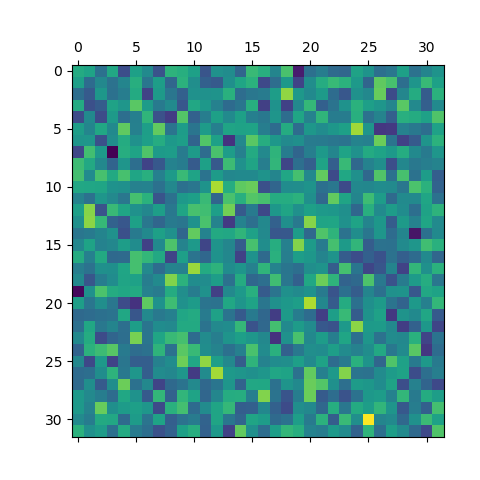

In [6]:
plt.matshow(y)

tensor(-1.0000)

In [88]:
int(np.log(128) / np.log(2))

7

In [91]:
n = 128
(n & (n-1) == 0) and n != 0

True

In [94]:
int(1/0.3333)

3

In [74]:
# datasets = fig.quick_run('load-data', name='svhn', labeled=True)

datasets = fig.quick_run('load-data', 'mvtec-transforms', name='mvtec', include_masks=True, include_class=True, 
                         cat='hazelnut', size=128, cut='all', augment_factor=10, 
                         brightness=None, contrast=None, **{'offset-mag': 0.1, 'scale-mag': 0.1})
len(datasets), datasets.keys()

| name: 'mvtec'
| [Pushed] _type: 'dataset/mvtec'
| use_default_dataroot: True (by default)
| [Pushed] dataroot: '/Users/flxleeb/workspace/local_data'
| [Pushed] mode: 'train'
| seed: None (by default)
| CREATING . (type=dataset/mvtec)
|  > dataroot: '/Users/flxleeb/workspace/local_data'
|  > size: 128
|  > cat: 'hazelnut'
|  > include-class --> include_class: True
|  > include-masks --> include_masks: True
|  > cut: 'all'
|  > augment_factor: 10
|  > [Pushed] augmenter [dict with 4 item/s]
|  >  > (rot): True
|  >  > (offset): 0.1
|  >  > (scale): 0.1
|  >  > (flip): 0.5
|  > [Pushed] augmenter._type: 'image-transform'
|  > CREATING augmenter (type=image-transform)
|  >  > prob: None (by default)
|  >  > flip_h: False (by default)
|  >  > flip_w: False (by default)
|  >  > rot_90: False (by default)
|  >  > rot: True
|  >  > scale: 0.1
|  >  > offset: 0.1
|  >  > flip: 0.5
|  >  > .brightness: None
|  >  > .contrast: None
|  >  > .noise: None
|  >  > src_bg: True (by default)
| device

(2, dict_keys(['train', 'val']))

In [75]:
dataset = datasets['train']
len(dataset)

5010

In [76]:
din = dataset.din
C, H, W = din
din

(3, 128, 128)

In [81]:
idx = torch.randint(len(dataset), (24,))
idx

tensor([3418, 2669, 1813, 3706,  842, 1707, 2133,  154,  817, 1787, 4319, 4910,
        1483, 1893,  838,   30, 4037,  574, 1580, 4929, 1839,   76, 1569, 2312])

In [78]:
idx[:] = idx[9]

In [82]:
batch = dataset[idx]
if len(batch) >= 2:
    X, Y, *other = batch
elif len(batch) == 1:
    X, *other = batch
    Y = None
[x.shape for x in batch]

[torch.Size([24, 3, 128, 128]),
 torch.Size([24, 1, 128, 128]),
 torch.Size([24])]

True (24, 3, 128, 128)


<IPython.core.display.Javascript object>


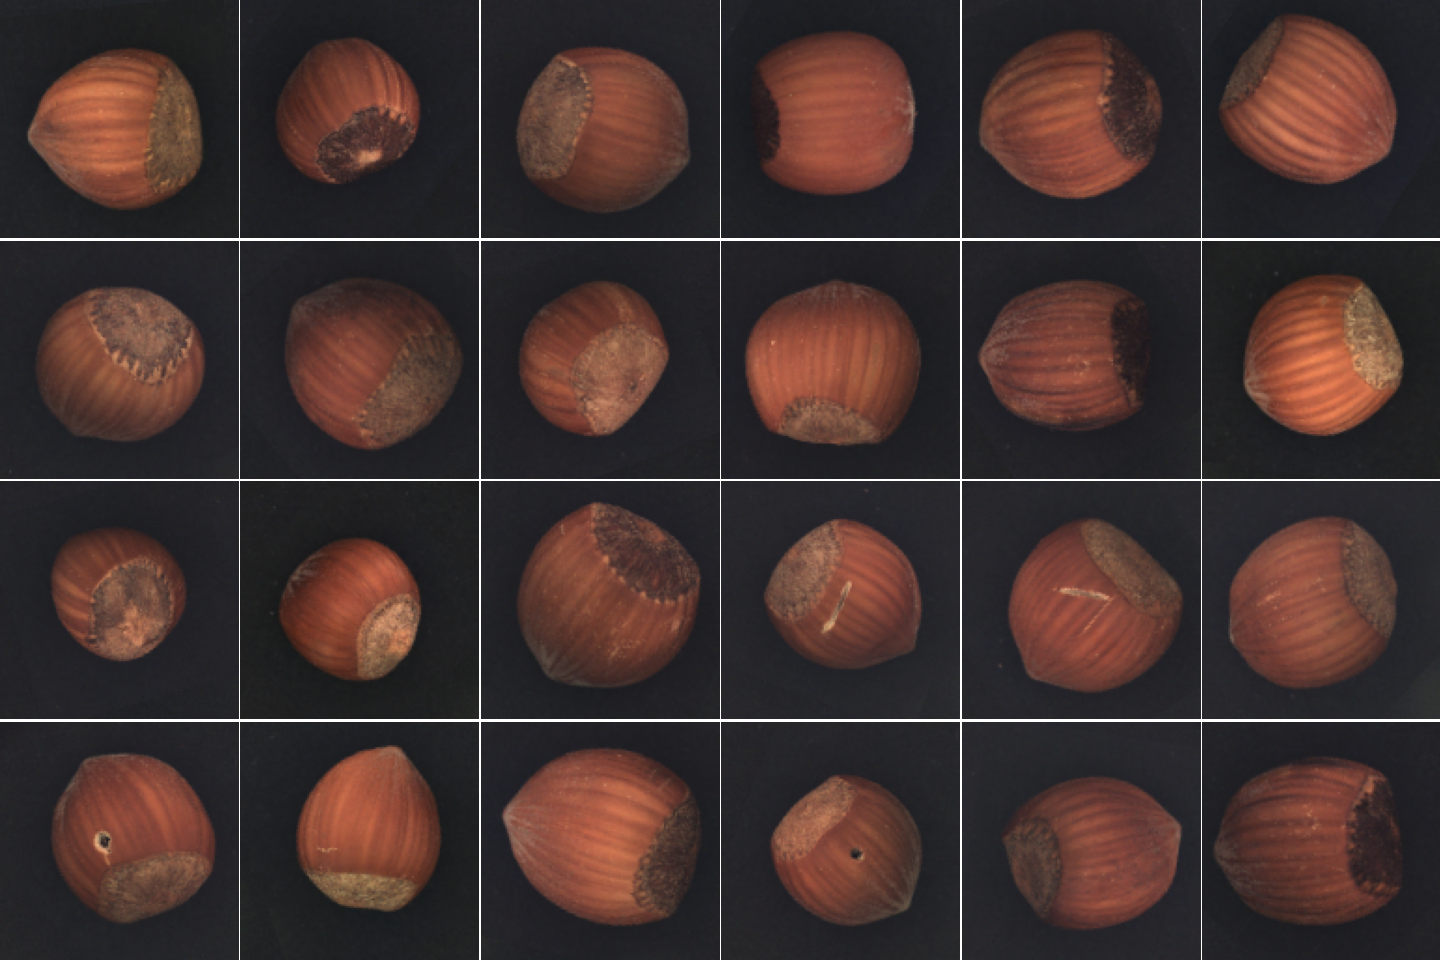

In [83]:
util.show_imgs(X, params=dict(cmap='gray') if C == 1 else {})
pass

True (24, 1, 128, 128)


<IPython.core.display.Javascript object>


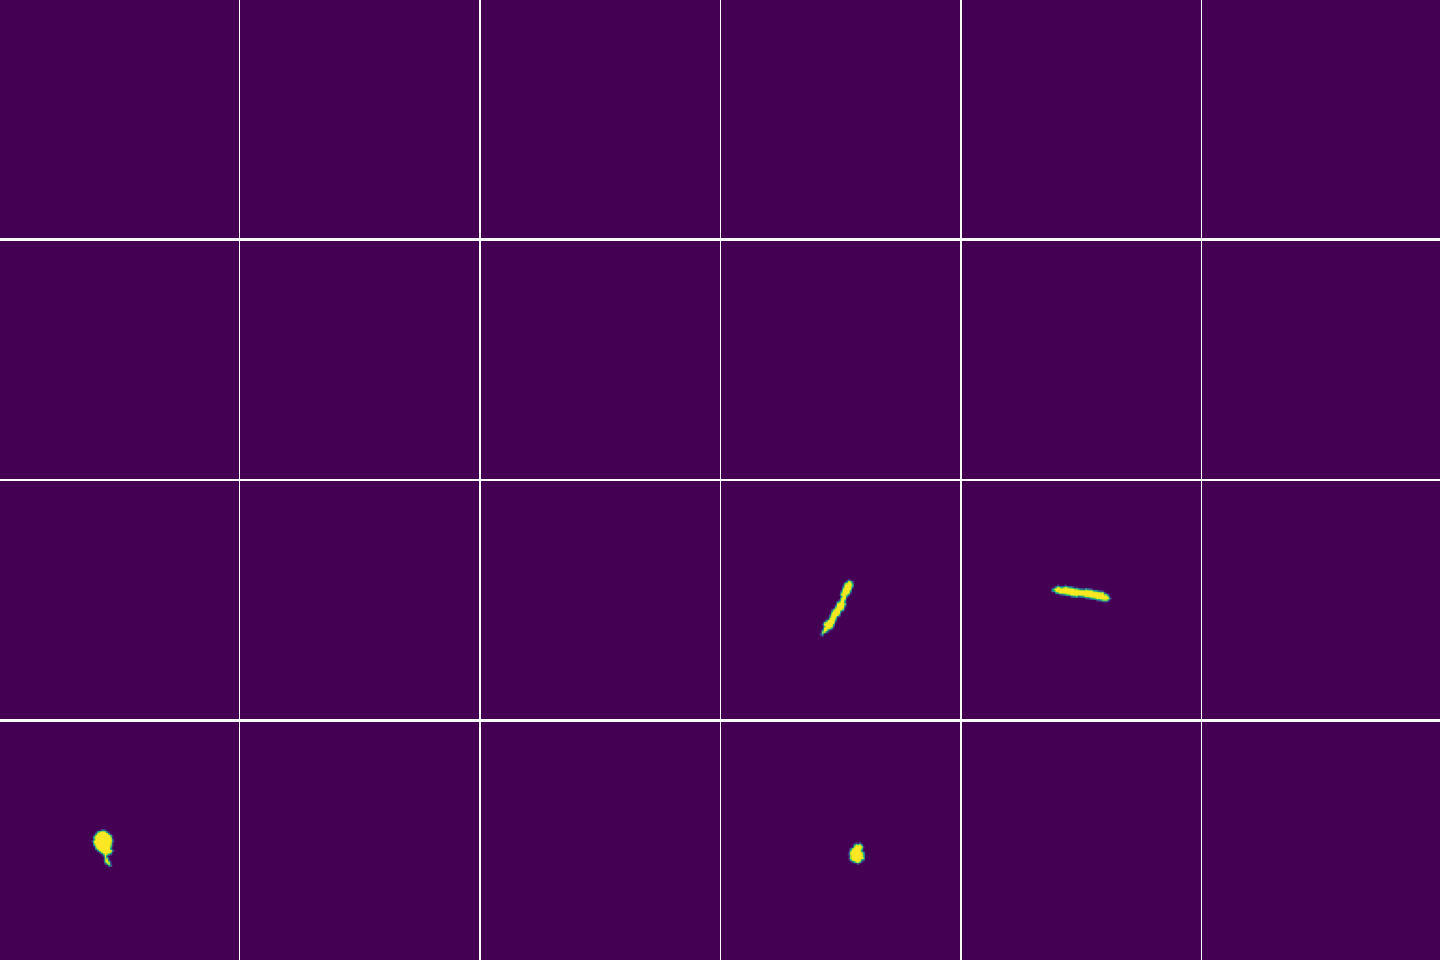

In [84]:
if Y is not None:
    util.show_imgs(Y)
pass

In [221]:
# T = tfms.ColorJitter(0.3, 0.3, 0.3, 0.3)
# T = util.RandomFlip(0.5, 0.5)
# T = util.RandomOrientation()

In [227]:
params = dict(prob=None,
             flip_h=True, flip_w=True, rot_90=False,
             rot=True, scale=0.1, offset=0.1, flip=None,
             brightness=0.2, contrast=0.2,
             src_bg=True)

# params = dict(prob=None,
#              flip_h=True, flip_w=True, rot_90=False,
#              rot=True, scale=0.02, offset=None, flip=None,
#              brightness=0.2, contrast=0.2,
#              src_bg=True)

# params = dict(prob=None,
#              flip_h=True, flip_w=True, rot_90=True,
#              brightness=0.2, contrast=0.2,
#              src_bg=True)


params = dict(prob=0.5,
             flip_h=True, flip_w=False, rot_90=False,
             brightness=0.2, contrast=0.2,
             src_bg=True)


T = fig.quick_create('image-transform', **params)

| prob: 0.5
| flip_h: True
| flip_w: False
| rot_90: False
| rot: False (by default)
| scale: None (by default)
| offset: None (by default)
| flip: None (by default)
| brightness: 0.2
| contrast: 0.2
| src_bg: True


In [228]:
len(T)

3

In [229]:
bidx = 0

In [230]:
N = 16
im = X[bidx:bidx+1].expand(N, *X.shape[1:])
# im = T(im)
im = torch.cat([T(i.unsqueeze(0)) for i in im])
im.shape

torch.Size([16, 3, 128, 128])

True (16, 3, 128, 128)


<IPython.core.display.Javascript object>


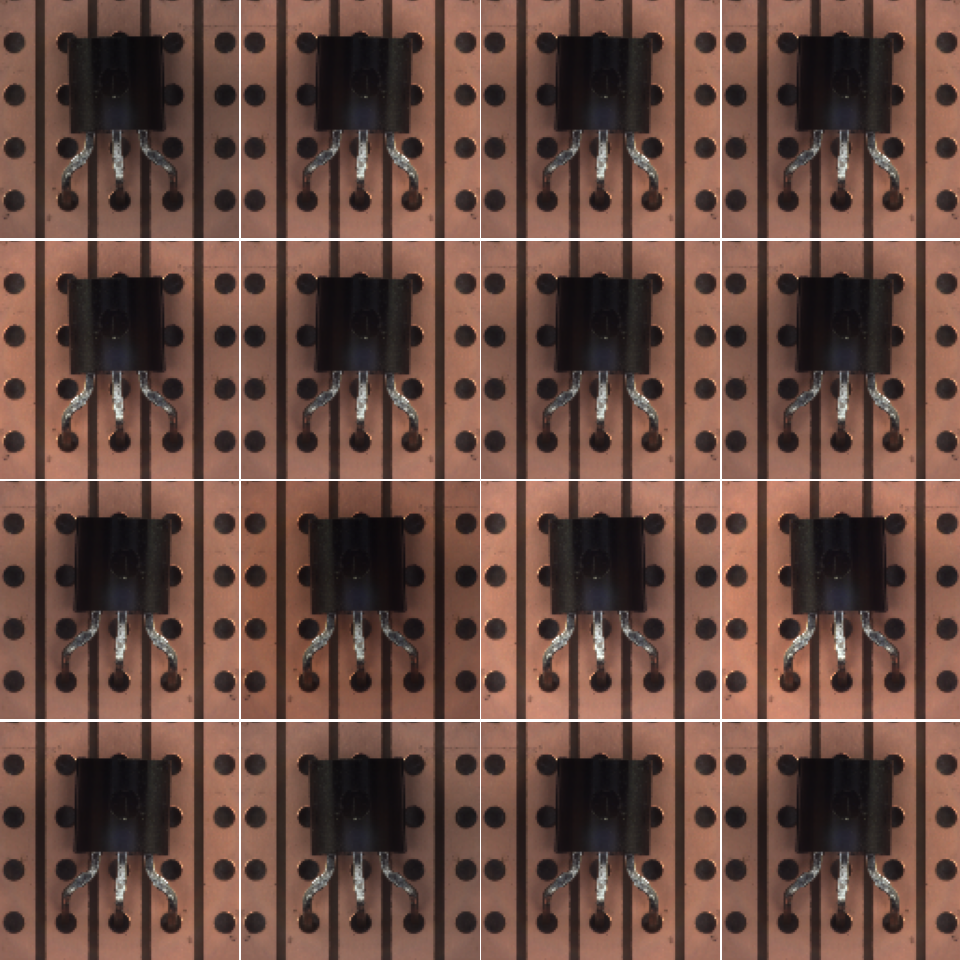

In [231]:
util.show_imgs(im)
pass

In [14]:
Ws = []
for i in range(8):
#     print(f'-{i}-')
    Ws.append(T(X, x=i))
len(Ws)

8

True (8, 3, 128, 128)


<IPython.core.display.Javascript object>


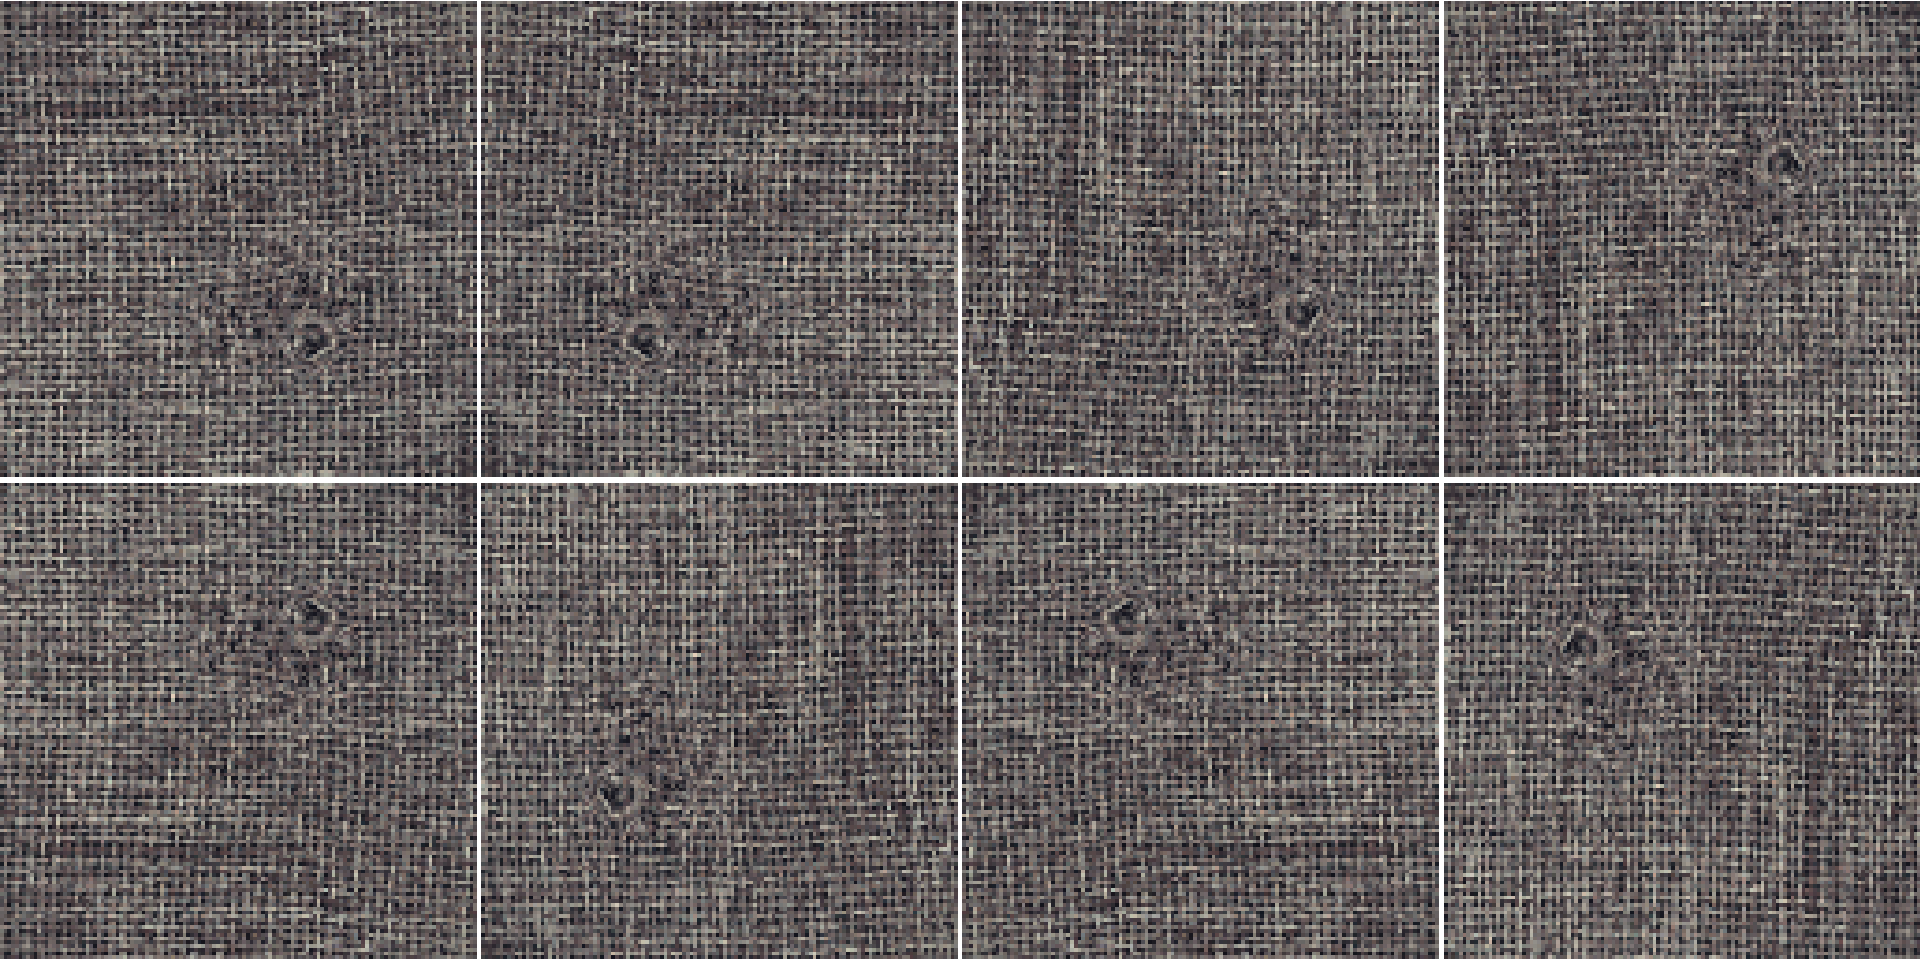

In [17]:
util.show_imgs(torch.stack([W[4] for W in Ws]))
pass

In [18]:
def rots(thetas):
    
    thetas = thetas.view(-1)
    
    sin = torch.sin(thetas)
    cos = torch.cos(thetas)
    
    return torch.stack([
        torch.stack([cos, -sin],-1),
        torch.stack([sin, cos],-1)
    ], -1)
def se2_rot_to_tfm(R):
    shape = R.shape[:-1]
    return torch.cat([R,torch.zeros(*shape, 1, device=R.device)],-1)

In [19]:
thetas = torch.linspace(0,2*np.pi, 16)

thetas = torch.rand(16)*2*np.pi

R = rots(thetas)
R.shape

torch.Size([16, 2, 2])

In [20]:
scale = torch.rand(len(R),1,1)*0.1 + 0.95
se2 = se2_rot_to_tfm(scale*R)
xy = torch.rand(len(R),2)*0.2 - 0.0
se2[...,:,-1] += xy
se2.shape

torch.Size([16, 2, 3])

In [21]:
B, C, H, W = X.shape
alpha = torch.ones(B,1,H,W)
imgs = torch.cat([X,alpha],1)

In [22]:
im = imgs[5:6].expand(16, *imgs.shape[1:])
im.shape

torch.Size([16, 4, 128, 128])

In [23]:
grid = F.affine_grid(se2, im.size())
grid.shape

/Users/flxleeb/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


torch.Size([16, 128, 128, 2])

In [24]:
sharpness_filter = torch.tensor([
    [0,1,0],
    [1,-5,1],
    [0,1,0]
]).float()

sharpen = nn.Conv2d(3,3,kernel_size=3,padding=1,padding_mode='reflect', bias=False)
sharpen.weight.requires_grad = False
sharpen.weight.copy_(sharpness_filter.expand(3,3,3,3))
sharpen

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False, padding_mode=reflect)

In [25]:
import numbers
import math
import torch
from torch import nn
from torch.nn import functional as F

channels = 3
kernel_size = 3
sigma = 1
dim = 2

if isinstance(kernel_size, numbers.Number):
    kernel_size = [kernel_size] * dim
if isinstance(sigma, numbers.Number):
    sigma = [sigma] * dim

# The gaussian kernel is the product of the
# gaussian function of each dimension.
kernel = 1
meshgrids = torch.meshgrid(
    [
        torch.arange(size, dtype=torch.float32)
        for size in kernel_size
    ]
)
for size, std, mgrid in zip(kernel_size, sigma, meshgrids):
    mean = (size - 1) / 2
    kernel *= 1 / (std * math.sqrt(2 * math.pi)) * \
              torch.exp(-((mgrid - mean) / (2 * std)) ** 2)

# Make sure sum of values in gaussian kernel equals 1.
kernel = kernel / torch.sum(kernel)

# Reshape to depthwise convolutional weight
kernel = kernel.view(1, 1, *kernel.size())
kernel = kernel.repeat(channels, *[1] * (kernel.dim() - 1))

blur = nn.Conv2d(3,3,kernel_size=3,padding=1,padding_mode='reflect', bias=False)
blur.weight.requires_grad = False
blur.weight.copy_(kernel.expand(3,3,3,3))
blur

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False, padding_mode=reflect)

In [26]:
tim = F.grid_sample(im, grid)
mask = (tim[:,-1:]>0.99).float()
tim = tim*mask + im*(1-mask)
tim = tim[:,:3]
tim.shape

/Users/flxleeb/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
<ipython-input-26-7cddf82a5b9e>:3: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output contiguous tensor even if some of the inputs are in channels_last format. (Triggered internally at  ../aten/src/ATen/native/TensorIterator.cpp:918.)
  tim = tim*mask + im*(1-mask)


torch.Size([16, 3, 128, 128])

In [27]:
# brightness
vals = torch.rand(len(R),1,1,1)
mag = 0.2
vals = vals.mul(2*mag).add(1-mag)

tim = vals*tim

# contrast
vals = torch.rand(len(R),1,1,1)
mag = 0.2
vals = vals.mul(2*mag).add(1-mag)

tim = vals*tim + (1-vals)*tim.mean(1,keepdim=True)


# sharpness

# vals = torch.rand(len(R),1,1,1)
# mag = 0.4
# vals = vals.mul(2*mag)#.add(1-mag)


# tim = vals*tim + (1-vals)*sharpen(tim)
# tim = sharpen(tim) # testing

# tim += vals * (tim - blur(tim))

# sharpened = original + (original − blurred) × amount.

# flipped
vals = torch.rand(len(R),1,1,1)

sel = (vals < 0.5).float()

tim = sel*tim.flip(-1) + (1-sel)*tim


##

tim = tim.clamp(min=0,max=1)

True (16, 3, 128, 128)


<IPython.core.display.Javascript object>


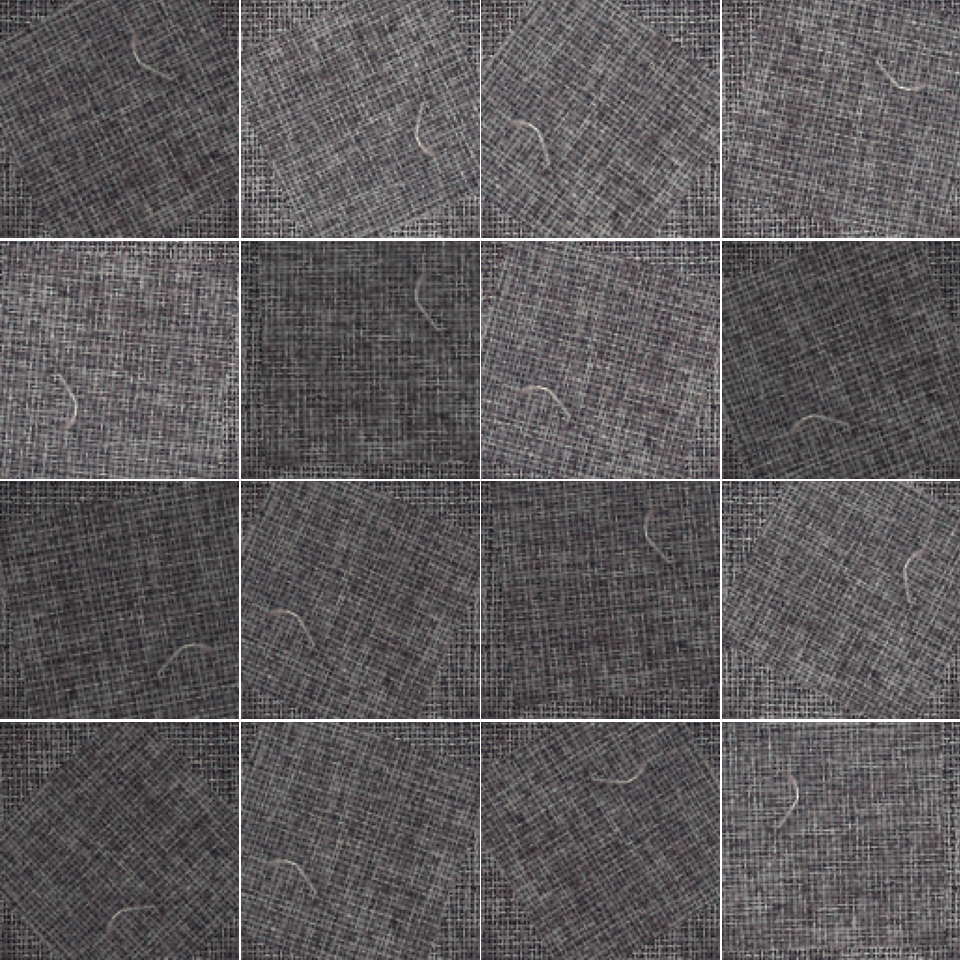

In [28]:
util.show_imgs(tim)
pass

In [88]:
np.array([0, 1, 3, 4, 5, 6, 7, 13, 17, 19])+10

array([10, 11, 13, 14, 15, 16, 17, 23, 27, 29])

In [5]:
datasets = fig.quick_run('load-data', name='emnist', labeled=True, group='balanced', train=False, 
#                          selected_classes=[10, 11, 13, 14, 15, 16, 17, 23, 27, 29]
                        )
len(datasets), datasets.keys()

| _dataset_type --> name: 'emnist'
| [Pushed] _type: 'dataset/emnist'
| use_default_dataroot: True (by default)
| [Pushed] dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
| [Pushed] mode: 'train'
| seed: None (by default)
| CREATING . (type=dataset/emnist)
|  > dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  > download: False (by default)
|  > train: False
|  > group: 'balanced'
|  > labeled: True
|  > selected_classes: None (by default)
|  > resize: True (by default)
| device: 'cpu' (by default)
Dataset moved to cpu
| [Pushed] din [list with 3 item/s]
|  > (0): 1
|  > (1): 32
|  > (2): 32
| [Pushed] dout: 47
| test_split: None (by default)
| val_split: None (by default)
| dataset-only: True (by default)


(2, dict_keys(['train', 'val']))

In [6]:
dataset = datasets['train']
len(dataset)

18800

In [7]:
dataset.labels.min(), dataset.labels.max()

(tensor(0), tensor(46))

In [8]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
nums = '0123456789'
unique = 'abdefghnqrt'

# key = nums + alphabet.upper() + unique + '0'
key = alphabet.upper()

key = nums

key = getattr(dataset, 'labels_key', key)

key

'0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [12]:
inds = [10, 11, 13, 14, 16, 17, 23, 26, 27, 29]

# inds = [36, 37, 38, 39, 41, 42, 43, 44, 45, 46]

print([key[i] for i in inds])

# lw = []

# for i in inds:
#     l = key[i]
    
#     lw.append(key.find(l.lower()))


['A', 'B', 'D', 'E', 'G', 'H', 'N', 'Q', 'R', 'T']


In [10]:
lw

[36, 37, 38, 39, 40, 41, 42, 43, 45, 46]

In [100]:
idx = torch.randint(len(dataset), (64,))
idx

tensor([2564, 3724, 3656, 1597, 2378, 3953, 1498,  475, 2024, 3943,  484, 2988,
         234, 2199, 3642, 3069,  593, 2198, 2767, 3417, 3372,  380,  893, 1977,
        2609, 3337, 3565, 3177, 3288, 3737, 1348, 2440,  129,  548,  159, 3968,
        1625, 1906,  709, 3280, 1312, 3123, 2141, 3824, 3308,  113, 2041, 2793,
        1569, 3562,  229,  528, 2496, 2289, 1407, 3398, 3752, 1980, 3288, 1482,
        1690,   48, 3127,  215])

In [101]:
X, Y = dataset[idx]

len(X), X.shape, Y.shape

(64, torch.Size([64, 1, 32, 32]), torch.Size([64]))

True (64, 1, 32, 32)


<IPython.core.display.Javascript object>


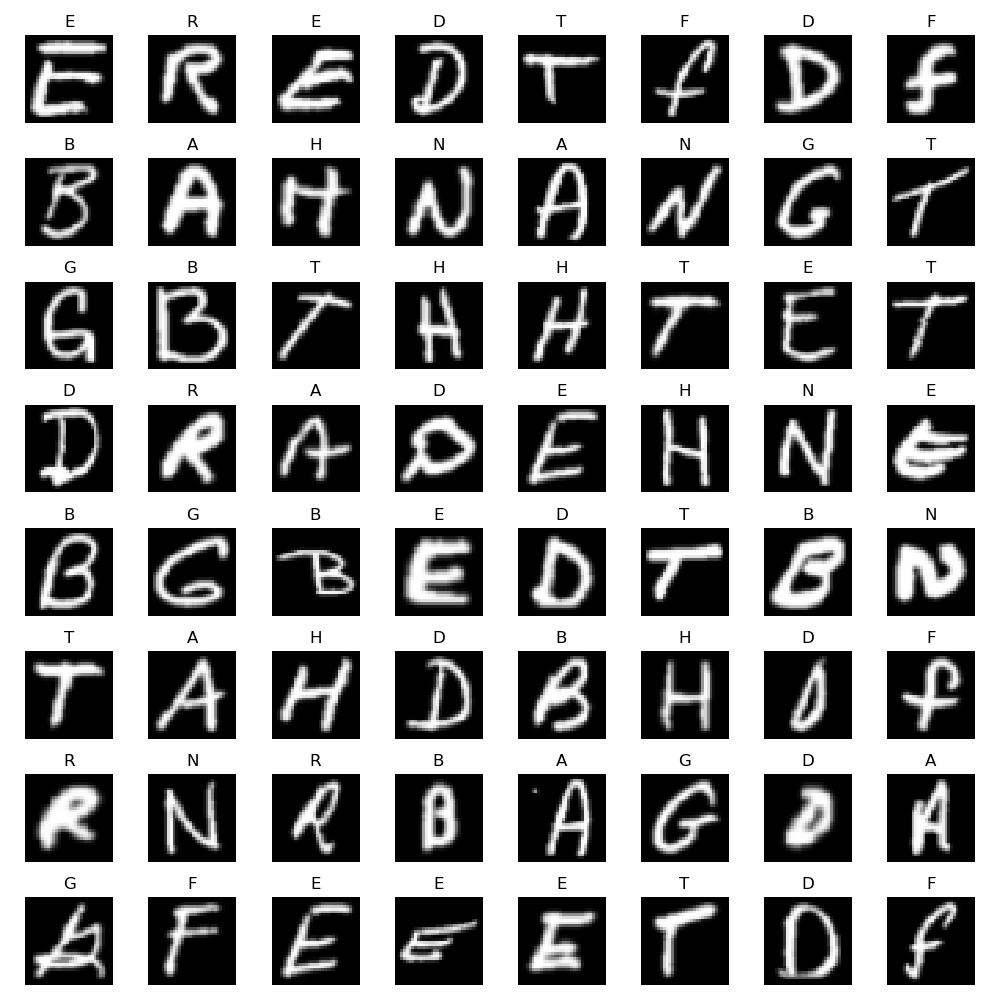

In [102]:
util.show_imgs(X, titles=[key[y] for y in Y.tolist()], figsize=(10,10), params=dict(cmap='gray'))
pass

In [47]:
D, M, N = 5, 1, 12

In [48]:
disc = nn.Linear(D, M)
disc

Linear(in_features=5, out_features=8, bias=True)

In [49]:
real = torch.randn(N,D)
fake = torch.randn(N,D)

In [51]:
real.requires_grad

False

In [52]:

real.requires_grad = True
fake.requires_grad = True
out = disc(real) + disc(fake)
out

tensor([[ 0.1485, -0.2172,  1.2755,  0.7828, -0.4351, -1.1685,  1.3026, -0.1109],
        [-2.0766, -2.7751,  2.0769, -1.0038,  0.1132, -0.3691, -1.4896,  2.0295],
        [-0.3741, -0.6323,  2.2897,  1.1127, -0.3044,  0.1144,  0.6610,  0.0689],
        [-0.4156, -1.3877,  0.6661,  0.8088, -1.9975, -0.2486,  2.3757,  1.4116],
        [ 1.8400,  1.8327,  1.9290,  2.7158,  1.8423,  0.0214,  1.1322, -1.3724],
        [-0.0688, -0.2244,  1.0453,  0.8890,  0.2626, -0.4589,  0.5320,  0.1133],
        [-1.1331, -1.1726,  0.5333, -0.3184, -1.2658, -1.4552,  0.6344,  0.3131],
        [-0.7570, -0.3275,  0.8260,  0.2967, -1.4169, -1.4076,  1.0534, -0.8350],
        [-0.2634, -1.2608,  2.0427,  0.3529, -0.3807, -0.9107,  0.8862,  0.9912],
        [-0.4523, -0.4322,  0.6390, -0.6028, -0.2076, -2.7619,  0.2427, -0.4287],
        [-0.0298,  0.3569, -0.0813,  1.4669, -0.9790, -0.1596,  1.7207, -0.5429],
        [ 0.7440, -0.1291,  1.7178,  0.7655,  0.8111, -1.4262,  0.8654,  0.3008]],
       grad_fn=

In [57]:
gout = autograd.grad(out.mean(), (real, fake), create_graph=True, retain_graph=True, only_inputs=True)
gout

(tensor([[ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157]], grad_fn=<MmBackward>),
 tensor([[ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.0067, -0.0014,  0.0075,  0.0157],
         [ 0.0167, -0.00

<module 'torch.nn' from 'C:\\Users\\anwan\\Anaconda3\\lib\\site-packages\\torch\\nn\\__init__.py'>

In [2]:
root = Path(r'C:\Users\anwan\Documents\workspace\local_data\mvtec\size128')

In [3]:
options = root.glob('*')

In [26]:
path = next(options)
path

WindowsPath('C:/Users/anwan/Documents/workspace/local_data/mvtec/size128/zipper.h5')

In [27]:
f = hf.File(path, 'r')
list(f.keys())

['mask_broken_teeth',
 'mask_combined',
 'mask_fabric_border',
 'mask_fabric_interior',
 'mask_rough',
 'mask_split_teeth',
 'mask_squeezed_teeth',
 'test_broken_teeth',
 'test_combined',
 'test_fabric_border',
 'test_fabric_interior',
 'test_good',
 'test_rough',
 'test_split_teeth',
 'test_squeezed_teeth',
 'train_good']

In [28]:
keys = [k for k in f.keys() if 'test_' in k]
np.random.shuffle(keys)
key = keys[0]
key

'test_good'

In [29]:
ds = f[key]
print(len(ds))
raw = ds[()]

imgs = raw[:9]
# imgs = [util.str_to_rgb(s) for s in raw]

if len(imgs.shape) == 3:
    imgs = imgs[...,np.newaxis]

imgs.shape

32


(9, 128, 128, 1)

<IPython.core.display.Javascript object>


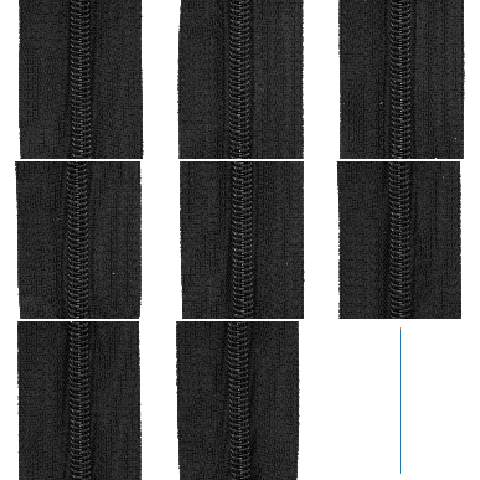

In [30]:
util.show_imgs(imgs, params=dict(cmap='gray'))
pass

In [2]:
from omnibelt import get_now

In [3]:
from PIL import Image
import cv2

In [4]:
root = r'C:\Users\anwan\Documents\workspace\local_data\mvtec'

ipaths = os.listdir(root)
print(ipaths)

['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.png', '069.png', '070.png', '071.png', '072.png', '073.png', '074.png', '075.png', '076.png', '077.png', '078.png', '079.png', '080.png', '081.png', '082.png', '083.png', '084.png', '085.png', '086.png', '087.png', '088.png', '089.png', '090.png'

In [5]:
iname = ipaths[14]
ipath = os.path.join(root, iname)

<IPython.core.display.Javascript object>


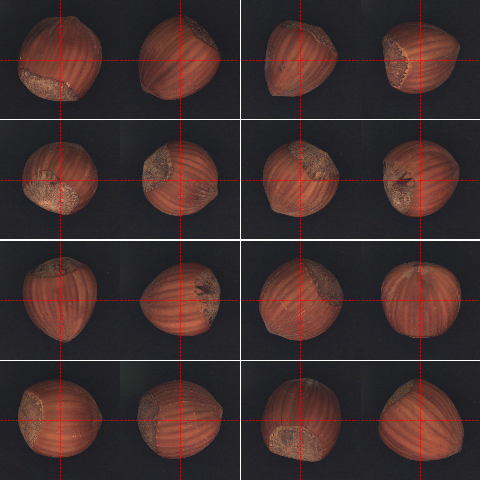

In [6]:
util.show_imgs(os.listdir(root)[:16], imgroot=root, grdlines=True)
pass

In [7]:
ipath

'C:\\Users\\anwan\\Documents\\workspace\\local_data\\mvtec\\hazelnut\\ground_truth\\crack\\014_mask.png'

In [7]:
with open(ipath, 'rb') as f:
    raw = f.read()
len(raw)

3299

In [8]:
im = util.str_to_byte_img(raw)
im.shape

(1024, 1024)

<IPython.core.display.Javascript object>


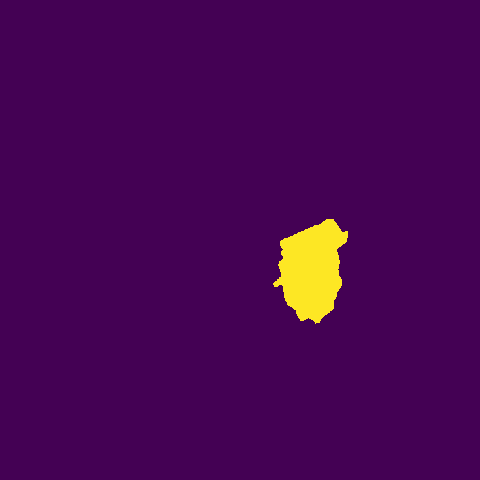

(<Figure size 480x480 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x13682408f08>])

In [9]:
util.show_imgs(im)

In [4]:
x = get_now(None)
x

datetime.datetime(2020, 10, 1, 13, 41, 34, 377980)

In [5]:
y = get_now(None)
y

datetime.datetime(2020, 10, 1, 13, 41, 47, 89912)

In [8]:
x < None

TypeError: '<' not supported between instances of 'datetime.datetime' and 'NoneType'

In [10]:
z = (y - x)

In [12]:
z.total_seconds() / 3600

0.003531092222222222

In [1]:
import pkgutil

In [2]:
package = pkgutil.get_loader("pip")

In [3]:
package.filename

AttributeError: 'SourceFileLoader' object has no attribute 'filename'

In [4]:
import imp

In [8]:
imp.find_module('asldfk')

ImportError: No module named 'asldfk'

In [15]:
import numpy as np

In [36]:
raw = np.array([
    [4.61, 537.2],
    [2198.985, 652.453],
    [0.586, 266.215],
    [.161, .013],
    [3228.467, .039],
])

raw = np.array([
    [0.015, 86.571],
    [80.015, 3582.668],
    [297.466, .186],
    [1.672, 0.33],
    [77.435, .032]
    
])


raw = np.array([
    [432.605,0.193],
    [2438.567, 11.062],
    [181.242, .025],
    [107.982, .062],
    
    
])


raw = np.array([
    [334.901, 280.646],
    [1651.516, .058],
    [0.075, 776.154]
])

raw = raw.clip(min=0.02)

In [37]:
(raw.sum(-1, keepdims=True) / raw).sum(0)

array([10352.55803202, 28478.60721157])

In [33]:
B, C, H, W = 5, 6, 16, 16
N = H*W

In [34]:
x = torch.randn(B, C, H, W).view(B, C, N)
x.shape

torch.Size([5, 6, 256])

In [35]:
# x = torch.from_numpy(np.mgrid[-1:1:H*1j, -1:1:W*1j]).unsqueeze(0)
# x.shape

In [36]:
K, V = 7, 4

In [53]:
key, val = torch.randn(K, C), torch.randn(V, K)
key.shape, val.shape

(torch.Size([7, 6]), torch.Size([4, 7]))

In [54]:
w = F.softmax(key.expand(B,*key.shape) @ x, dim=-1)
w.shape

torch.Size([5, 7, 256])

In [55]:
y = val.expand(B, *val.shape) @ w
y.shape

torch.Size([5, 4, 256])

In [41]:
n = nn.Unfold(4,stride=2)

In [42]:
y = n(X)
y.shape

torch.Size([1, 32, 961])

In [44]:
c = y.view(2,16, -1).mean(1)

<IPython.core.display.Javascript object>


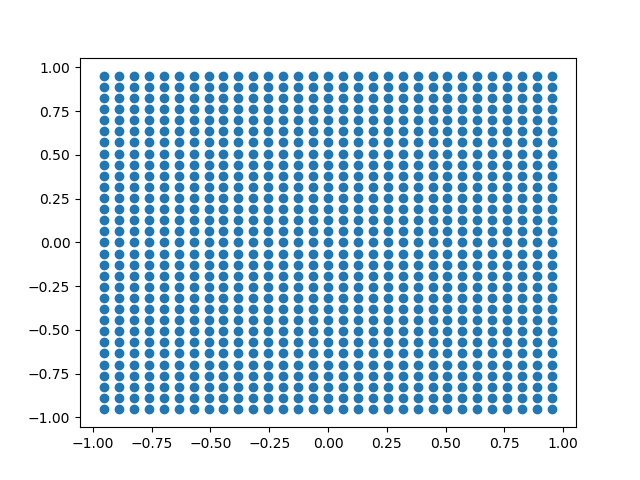

In [55]:
plt.figure()
plt.scatter(*c.numpy())
pass

In [50]:
f = nn.Fold((62,62), 1, stride=1)

In [52]:
k, s = 4, 2
h = (H - (k-1) - 1)//s + 1
w = (W - (k-1) - 1)//s + 1
h,w

(31, 31)

In [158]:
B,G,K,N = 5, 4, 2, 31*31

In [159]:
x = torch.randn(B,G,K,N)
# x = x.cumsum(0)
x = F.softmax(x, dim=-1)
x.shape

torch.Size([5, 4, 2, 961])

In [160]:
h, w = util.calc_tiling(x.size(-1))
h, w

(31, 31)

In [161]:
cmap = cm.get_cmap('seismic')

In [178]:
g = x.sum(0) / B
g = g.view(G,K,h,w)#.permute(0,2,1,3).contiguous().view(G*h,K*w)
g = g.view(G*K,h,w)#*100
g = torch.from_numpy(cmap(g.numpy())).permute(0,3,1,2)
g = torchvision.utils.make_grid(g, nrow=K, padding=1, pad_value=1,
#                                 scale_each=True, normalize=True,
                               )#.norm(p=1, dim=0)
g.shape

torch.Size([4, 129, 65])

<IPython.core.display.Javascript object>


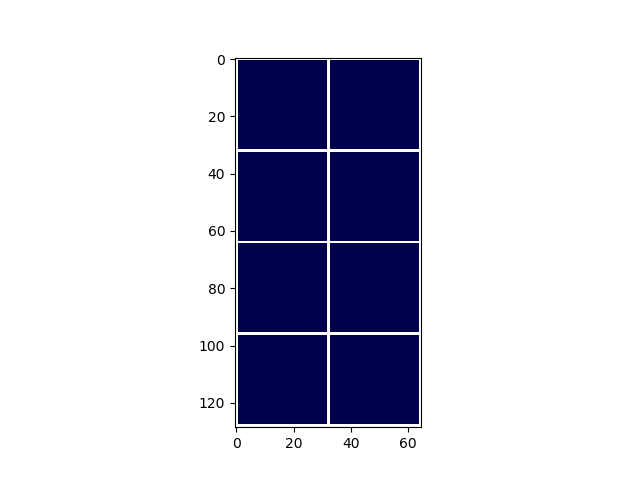

In [179]:
plt.figure()
plt.imshow(g[:3].permute(1,2,0))
# plt.imshow(g)

In [140]:
from matplotlib import cm

In [152]:
x = cm.get_cmap('seismic')(np.random.randn(10000).reshape(100,100))
x.shape

(100, 100, 4)

<IPython.core.display.Javascript object>


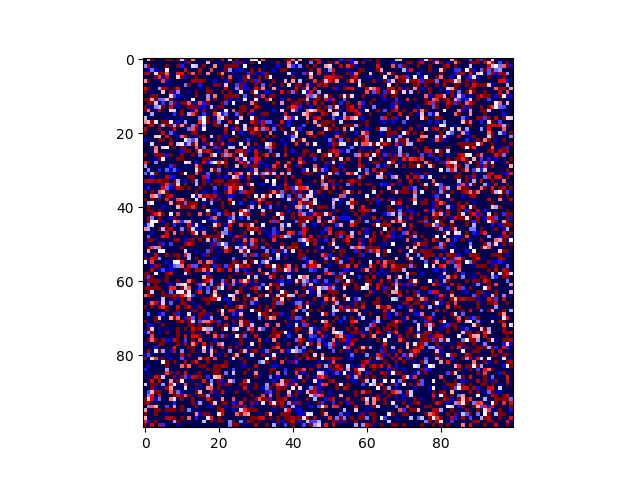

In [153]:
plt.figure()
plt.imshow(x)

In [ ]:
im = np.uint8(cm.gist_earth(myarray)*255)

In [69]:
# plt.figure()
# plt.imshow(g[0,0])

In [31]:
f = nn.Fold((64,64), 4, stride=2)

In [34]:
z = f(F.sigmoid(y))
z.shape

/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([5, 2, 64, 64])

<IPython.core.display.Javascript object>


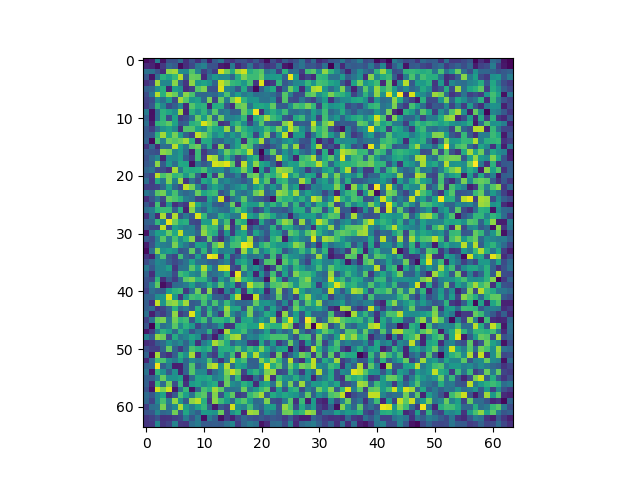

In [56]:
plt.figure()
plt.imshow(z[0,0])

In [17]:
x = torch.randn(C, N)
x.expand(B).shape

RuntimeError: expand(torch.FloatTensor{[4, 8]}, size=[10]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)

In [10]:
x = torch.randn(B,C,N)
x.shape

torch.Size([10, 4, 8])

In [12]:
n = nn.Softmax(dim=-1)

In [13]:
y = n(x)
y.shape

torch.Size([10, 4, 8])

In [14]:
y.view(B,C,-1).sum(-1)

tensor([[1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]])

In [2]:
C = trn.get_config()
C

{{'_ipython_canary_method_should_not_exist_':{{}}}}

In [3]:
C.l = [trn.get_config(), trn.get_config()]
C

{{'_ipython_canary_method_should_not_exist_':{{}}, 'l':t[{{}}, {{}}]}}

In [4]:
C['l.0.a.b.1.c'] = 10

In [5]:
'l.0.a.b' in C

True

In [6]:
type(C.l)

foundation.train.config.ConfigList

In [7]:
C['l.0.a']

{{'b':{{'1':{{'c':10}}}}, '_ipython_canary_method_should_not_exist_':{{}}}}

In [8]:
'l.0' in C

True

In [9]:
C

{{'_ipython_canary_method_should_not_exist_':{{}}, 'l':t[{{'a':{{'b':{{'1':{{'c':10}}}}, '_ipython_canary_method_should_not_exist_':{{}}}}}}, {{}}]}}

In [10]:
C.pull('l.0')

  0 (type=dict): 
    (a) (type=dict): 
      (b) (type=dict): 
        (1) (type=dict): 
        (c): 10
      (_ipython_canary_method_should_not_exist_) (type=dict): 


{'a': {'b': {'1': {'c': 10}}, '_ipython_canary_method_should_not_exist_': {}}}

In [12]:
C.l.pull('0')

  0 (type=dict): 
    (a) (type=dict): 
      (b) (type=dict): 
        (1) (type=dict): 
        (c): 10
      (_ipython_canary_method_should_not_exist_) (type=dict): 


{'a': {'b': {'1': {'c': 10}}, '_ipython_canary_method_should_not_exist_': {}}}

In [11]:
C.pull('l')

  l (type=list): 
    [0] (type=dict): 
      (a) (type=dict): 
        (b) (type=dict): 
          (1) (type=dict): 
          (c): 10
        (_ipython_canary_method_should_not_exist_) (type=dict): 
    [1] (type=dict): 


({'a': {'b': {'1': {'c': 10}},
   '_ipython_canary_method_should_not_exist_': {}}},
 {})

In [34]:
C['l.0.a.b']

{{'1':{{'c':10}}, '_ipython_canary_method_should_not_exist_':{{}}}}

In [16]:
x = torch.randn(10,12)

In [24]:
ls = x.split([3,3,3,3], dim=1)
[l.shape for l in ls]

[torch.Size([10, 3]),
 torch.Size([10, 3]),
 torch.Size([10, 3]),
 torch.Size([10, 3])]

In [6]:
C.update()

In [7]:
c = C['l.0.a.b.1']
c

{{'c':10, '_ipython_canary_method_should_not_exist_':{{}}}}

In [9]:
c.pull('l')

l: [{{'a':{{'b':{{'1':{{'c':10, '_ipython_canary_method_should_not_exist_':{{}}}}}}}}}}, {{}}] (in parent)


({{'a':{{'b':{{'1':{{'c':10, '_ipython_canary_method_should_not_exist_':{{}}}}}}}}}},
 {{}})

In [18]:

x[2:] = [1,2]
x

[1, 2, 1, 2]

In [4]:
B, N, D, M = 10, 8, 6, 2

In [5]:
x = torch.randn(B, D, N, N)
x.shape

torch.Size([10, 6, 8, 8])

In [7]:
conv = nn.Unfold(2)

In [8]:
conv(x).shape

torch.Size([10, 24, 49])

In [26]:
B, N, D, M = 10, 8, 6, 2

In [27]:
A = torch.randn(B,D)
S = torch.randn(N,D)

In [34]:
out = F.cosine_similarity(A.unsqueeze(1), S.unsqueeze(0), dim=-1)
out.shape

torch.Size([10, 8])

In [35]:
out

tensor([[ 0.3176,  0.0936, -0.1476, -0.0195,  0.3700, -0.3900,  0.3549,  0.2018],
        [-0.0801,  0.5519,  0.5747, -0.3497,  0.1317,  0.6117, -0.3976, -0.2558],
        [-0.2931, -0.1262, -0.2615,  0.5228, -0.5873, -0.0732,  0.0640,  0.1640],
        [-0.2877, -0.7237, -0.9057, -0.5739, -0.2735, -0.0863, -0.1532,  0.3962],
        [-0.2767, -0.2360,  0.3426, -0.4350,  0.3134,  0.3668, -0.5839, -0.5496],
        [-0.3419,  0.2782, -0.1281, -0.1999, -0.8643,  0.4912, -0.6784,  0.0025],
        [-0.2083, -0.6270, -0.5396,  0.2619, -0.0166, -0.5204,  0.1208,  0.0716],
        [-0.3484,  0.2230,  0.6365,  0.0951,  0.1327,  0.6528, -0.0580, -0.2025],
        [ 0.1961, -0.3887, -0.2771,  0.2593,  0.1913, -0.7912, -0.0784, -0.3118],
        [-0.2186,  0.3331,  0.6389,  0.3429,  0.5625,  0.3629,  0.4653,  0.0203]])

In [41]:
out.sort(0)[0]

tensor([[-0.3484, -0.7237, -0.9057, -0.5739, -0.8643, -0.7912, -0.6784, -0.5496],
        [-0.3419, -0.6270, -0.5396, -0.4350, -0.5873, -0.5204, -0.5839, -0.3118],
        [-0.2931, -0.3887, -0.2771, -0.3497, -0.2735, -0.3900, -0.3976, -0.2558],
        [-0.2877, -0.2360, -0.2615, -0.1999, -0.0166, -0.0863, -0.1532, -0.2025],
        [-0.2767, -0.1262, -0.1476, -0.0195,  0.1317, -0.0732, -0.0784,  0.0025],
        [-0.2186,  0.0936, -0.1281,  0.0951,  0.1327,  0.3629, -0.0580,  0.0203],
        [-0.2083,  0.2230,  0.3426,  0.2593,  0.1913,  0.3668,  0.0640,  0.0716],
        [-0.0801,  0.2782,  0.5747,  0.2619,  0.3134,  0.4912,  0.1208,  0.1640],
        [ 0.1961,  0.3331,  0.6365,  0.3429,  0.3700,  0.6117,  0.3549,  0.2018],
        [ 0.3176,  0.5519,  0.6389,  0.5228,  0.5625,  0.6528,  0.4653,  0.3962]])

In [12]:
x = np.random.randn(4)
x

array([-0.11903327,  1.10899404, -1.12261048, -0.01919107])

In [3]:
b = x.tobytes()
b

b"\x15\xba\xa0\x0b\xd5\xc0\xa6\xbf\xb4T'\xebxM\xf5?\xd7\x91\xfeE\xc66\xd8?\xbew\xa2;O\x9c\x89\xbf"

In [15]:
c = complex(x[0], x[1])
c

(-0.11903326579480775+1.1089940427676077j)

In [17]:
complex(str(c)) == c

True

In [19]:
c.real, c.imag

(-0.11903326579480775, 1.1089940427676077)

In [22]:
class A:
    pass

In [5]:
s = b.decode('latin1')
s

"\x15º\xa0\x0bÕÀ¦¿´T'ëxMõ?×\x91þEÆ6Ø?¾w¢;O\x9c\x89¿"

In [8]:
j = json.dumps(s)
j

'"\\u0015\\u00ba\\u00a0\\u000b\\u00d5\\u00c0\\u00a6\\u00bf\\u00b4T\'\\u00ebxM\\u00f5?\\u00d7\\u0091\\u00feE\\u00c66\\u00d8?\\u00bew\\u00a2;O\\u009c\\u0089\\u00bf"'

In [9]:
js = json.loads(j)
js

"\x15º\xa0\x0bÕÀ¦¿´T'ëxMõ?×\x91þEÆ6Ø?¾w¢;O\x9c\x89¿"

In [10]:
bb = js.encode('latin1')
bb

b"\x15\xba\xa0\x0b\xd5\xc0\xa6\xbf\xb4T'\xebxM\xf5?\xd7\x91\xfeE\xc66\xd8?\xbew\xa2;O\x9c\x89\xbf"

In [11]:
b == bb

True

In [44]:
q = torch.randn(8,6)
steps = 10
bounds = (-2,2)
bounds = None

In [66]:
Q = q.clone()

N, D = Q.shape
S = steps

dH, dW = util.calc_tiling(D)

# bounds = (-2,2)

save_inds = [0, 1, 2, 3]

saved_walks = []

I = torch.eye(D).view(1,1,D,D)

deltas = torch.linspace(0,1,steps=S)
deltas = torch.stack([deltas]*D) # DxS

mn, mx = (Q.min(0)[0].view(D,1), Q.max(0)[0].view(D,1)) if bounds is None else torch.tensor(bounds).view(2,1,1).expand(2, D,1)
# print(mn.shape, mx.shape)

deltas *= mx - mn
deltas += mn
deltas = deltas.t().unsqueeze(0).expand(N,S,D).unsqueeze(-1)

Q = Q.unsqueeze(1).unsqueeze(-1).expand(N,S,D,D)

vecs = Q*(1-I) + deltas*I # NxSxDxD
vecs = vecs.permute(0,1,3,2)


In [67]:
vecs.shape

torch.Size([8, 10, 6, 6])

In [69]:
D = torch.diagonal(vecs, dim1=2, dim2=3)
D.shape

torch.Size([8, 10, 6])

In [70]:
D[0,0]

tensor([-1.3966, -0.8228, -0.8089, -2.5588, -1.9042, -2.5482])

In [63]:
b = 2

q[b]

tensor([-1.3966, -0.0268,  0.3520,  1.5809,  0.1175, -0.4542])

In [65]:
vecs[b,:,1]

tensor([[-1.3966, -0.8228,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966, -0.5782,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966, -0.3337,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966, -0.0891,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  0.1555,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  0.4000,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  0.6446,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  0.8892,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  1.1338,  0.3520,  1.5809,  0.1175, -0.4542],
        [-1.3966,  1.3783,  0.3520,  1.5809,  0.1175, -0.4542]])

In [6]:
x = torch.randint(100, size=(8,8))
x

tensor([[10, 26, 75, 85, 85, 95, 59, 94],
        [58, 60, 42, 15, 83,  0, 39, 23],
        [38, 98,  8, 74, 74,  9, 96, 97],
        [ 7, 54, 31, 83, 63, 83, 91, 63],
        [43, 34, 42, 28, 39, 38, 17,  2],
        [56, 76, 46, 78,  0,  4, 23, 74],
        [24, 92, 35, 74, 93, 19, 30, 87],
        [35, 47, 67, 35, 30, 68, 38, 23]])

In [8]:
x.sort(-1)[0]

tensor([[10, 26, 59, 75, 85, 85, 94, 95],
        [ 0, 15, 23, 39, 42, 58, 60, 83],
        [ 8,  9, 38, 74, 74, 96, 97, 98],
        [ 7, 31, 54, 63, 63, 83, 83, 91],
        [ 2, 17, 28, 34, 38, 39, 42, 43],
        [ 0,  4, 23, 46, 56, 74, 76, 78],
        [19, 24, 30, 35, 74, 87, 92, 93],
        [23, 30, 35, 35, 38, 47, 67, 68]])

In [5]:
dataset = trn.get_dataset('dSprites')
len(dataset)

Loading dataset: dSprites
dataroot: /is/ei/fleeb/workspace/local_data
label_type: None (by default)
din: (1, 64, 64) (by default)
dout: None (by default)
filename: dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz (by default)
Loading dSprites dataset from disk: /is/ei/fleeb/workspace/local_data/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz


737280

In [4]:
# sample = dataset[0]

In [2]:
class Test(object):
    def __init__(self, x='no'):
        print('Test', x)
        self.x = x

In [3]:
class D(object):
    def __new__(cls, x='A'):
        print('new-D', x)
        print(cls)
        print(cls.__mro__)
        if x[0] == 'A':
            return super(Test, cls).__new__(Test)
        
    @classmethod
    def _get_type(cls):
        return cls

In [4]:
class M(object):
    def __init__(self, x='test'):
        print('mod', x)
        super().__init__(x='test2')
        
    

In [5]:
C = type('C', (M,D), {})


In [6]:
c = C('hmm')

new-D hmm
<class '__main__.C'>
(<class '__main__.C'>, <class '__main__.M'>, <class '__main__.D'>, <class 'object'>)


In [7]:
A.__name__

NameError: name 'A' is not defined

In [ ]:
A.__name__ = 'B'
A.__name__

In [ ]:
type(A())

In [ ]:
A().__class__.__name__

In [ ]:
C = train.get_config()

In [ ]:
C

In [ ]:
C.a.b.c = 'wow'

In [ ]:
C

In [ ]:
C.begin()
C.another_test = 'huh'
C

In [ ]:
C['how', 'does'] = 134
C

In [ ]:
C.abort()

In [ ]:
C

In [ ]:

len(A)

In [ ]:

len(B)

In [ ]:
cream = 100000
A = set(torch.randperm(500000).tolist()[:cream])
B = set(torch.randperm(500000).tolist()[:cream])

In [ ]:
len(A.intersection(B))

In [ ]:
# import tqdm
from time import sleep

def transfer():
    pbar = tqdm(range(1000), desc="Transfer progress",)# ncols=100, bar_format='{l_bar}{bar}|')
    for i in pbar:
        sleep(np.random.rand()/50)
        if np.random.rand() < 0.01:
            interrupt(pbar)
                # break

def interrupt(pbar):
    pbar.write("File transfer interrupted: {}".format(np.random.randint(10)), end="")

transfer()

In [ ]:
graph = {0:[1,2], 1:[3,4], 2:[4,6], 3:[7], 4:[5], 5:[], 6:[], 7:[]}

In [ ]:
util.toposort(0,lambda x: graph[x], depth_first=True)

In [ ]:
util.set_seed(0)

In [ ]:

print(np.random.randint(10,size=2))
print(util.subset(10,3))
print(np.random.randint(10,size=2))

In [ ]:
torch.arange(10)[util.subset(10,3,2)]

In [ ]:
N = 2

In [ ]:
A = torch.randn(N)
B = torch.randn(N)

In [ ]:
print(A)
print(B)

In [ ]:
def MMD(p, q, C=None):

    if C is None:
        C = q.size(-1)

    ps = util.lorentzian(p, C=C)
    qs = util.lorentzian(q, C=C)
    pq = util.lorentzian(p, q, C=C)

    return ps.mean() + qs.mean() - pq.mean()

In [ ]:
num = 10000
failed = False
for i in tqdm(range(num)):
    A = torch.randn(N)
    B = torch.randn(N)
    a, b = A.unsqueeze(-1),B.unsqueeze(-1)
    
    d = MMD(a,b)
    if d < 0:
        print('Failed: {}'.format(i))
        failed = True
        break
if not failed:
    print('Success')

In [ ]:
A, B

In [ ]:
d

In [ ]:
a, b = A.unsqueeze(-1),B.unsqueeze(-1)

In [ ]:
util.MMD(a,b)

In [ ]:
aa = util.lorentzian(a, C=C)
bb = util.lorentzian(b, C=C)
ab = util.lorentzian(a, b, C=C)

In [ ]:
aa, bb, ab

In [ ]:
aa.mean(), bb.mean()

In [ ]:
ab.mean()

In [ ]:
util.MMD(p, q)

In [ ]:
C = 2

In [ ]:
ps = util.lorentzian(p, C=C)
qs = util.lorentzian(q, C=C)
pq = util.lorentzian(p, q, C=C)

In [ ]:
ps

In [ ]:
qs

In [ ]:
def pairwise_distance(ps, qs=None, p=2): # last dim is summed

    if qs is None:
        return F.pdist(ps, p=p)

    ps, qs = ps.unsqueeze(-2), qs.unsqueeze(-3)
    return (ps - qs).pow(p).sum(-1).pow(1/p)

In [ ]:
def MMD(p, q, C=None):

    if C is None:
        C = q.size(-1)

    ps = util.lorentzian(p, C=C)
    qs = util.lorentzian(q, C=C)
    pq = util.lorentzian(p, q, C=C)

    return ps.view(-1).mean() + qs.view(-1).mean() - 2*pq.view(-1).mean()

In [ ]:
pairwise_distance(q, p)

In [ ]:
pairwise_distance(p, q)

In [ ]:
MMD(p, q)

In [ ]:
ps

In [ ]:
qs

In [ ]:
pq.sum()/4

In [ ]:
pq

In [ ]:
M = nn.Sequential(nn.Linear(10,4), nn.ReLU())
M

In [ ]:
list(M)

In [ ]:
class T(object):
    __name__ = 'A'
    pass

In [ ]:
T.__name__

In [ ]:
t = T()
t.__name__

In [ ]:
type(t).__name__

In [ ]:
t.__class__.__name__

In [ ]:
a = util.NS()
a.b.c.d = 'hello'
print(repr(a)) # --> NS('b':NS('c':NS('d':'hello')))

In [ ]:
a.todict()

In [ ]:
nn.ConvTranspose2d

In [ ]:
conv = nn.Conv2d(8, 8, 2, padding=1)
conv1 = nn.Conv2d(8, 8, 1)
conv2 = nn.Conv2d(8, 8, 2, stride=2)
conv

In [ ]:
X = torch.randn(3, 8, 16, 16)

In [ ]:
I = X
I = conv(I)
I = conv1(I)
I = conv2(I)
Y = I
Y.shape

In [ ]:
X2 = F.interpolate(X, size=(32,32), mode='bilinear')
X2.shape

In [ ]:
conv = nn.ConvTranspose2d(8, 8, 2, stride=2, padding=0, output_padding=0)
conv1 = nn.Conv2d(8, 8, 1)
conv2 = nn.Conv2d(8, 8, 2, stride=1, padding=0)
conv

In [ ]:
X = torch.randn(3, 8, 16, 16)

In [ ]:
I = X
I = conv(I)
# I = conv1(I)
# I = conv2(I)
Y = I
Y.shape

In [ ]:
Y[0,0,-3:,-3:]

In [ ]:
path = os.path.join(os.environ['FOUNDATION_DATA_DIR'], '3dshapes', '3dshapes.h5')
path

In [ ]:
dataset = hf.File(path, 'r')
print(dataset.keys())
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
labels = dataset['labels']  # array shape [480000,6], float64
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000

_FACTORS_IN_ORDER = ['floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape',
                     'orientation']
_NUM_VALUES_PER_FACTOR = {'floor_hue': 10, 'wall_hue': 10, 'object_hue': 10, 
                          'scale': 8, 'shape': 4, 'orientation': 15}

In [ ]:
images.shape, labels.shape

In [ ]:
torch.tensor([0,2,3]).tolist()

In [ ]:
len(images)

In [ ]:
images[torch.tensor([0,2,3]).tolist()].shape

In [ ]:
np.array(torch.randn(3).cuda())

In [ ]:
img = images[0]
img.shape

In [ ]:
img.dtype

In [ ]:
plt.imshow(img)

In [ ]:
root = '/is/ei/fleeb/workspace/chome/trained_nets'
target = '/is/ei/fleeb/workspace/trained_nets/3dshapes_models'
util.create_dir(target)

In [ ]:
from shutil import copyfile

In [ ]:
names = ['checkpoint_100.pth.tar',]# 'best.pth.tar']

In [ ]:
for d in [d for d in os.listdir(root) if '1205' in d]:
    print(d)
    for name in names:
        if name in os.listdir(os.path.join(root, d)):
            print('\t',name)
            if d not in os.listdir(target):
                os.mkdir(os.path.join(target,d))
            copyfile(os.path.join(root, d, name), os.path.join(target, d, name))
            copyfile(os.path.join(root, d, 'config.tml'), os.path.join(target, d, 'config.tml'))

In [ ]:
os.listdir('/is/ei/fleeb/workspace/media/hybrid/new/3dshapes/pres')

In [ ]:
def f(x, *a, **kw):
    print(x, a, kw)

In [ ]:
sig = inspect.signature(f)
sig.parameters

In [ ]:
for n, p in sig.parameters.items():
    pass

In [ ]:
p.kind

In [ ]:
C = util.get_config('base')
C.keys()

In [ ]:
C.device

In [ ]:
C.model

In [ ]:
data = np.load('../local_data/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='bytes')
list(data.keys())

In [ ]:
def rec_decode(obj):
    if isinstance(obj, dict):
        return {rec_decode(k):rec_decode(v) for k,v in obj.items()}
    if isinstance(obj, list):
        return [rec_decode(x) for x in obj]
    if isinstance(obj, tuple):
        return tuple(rec_decode(x) for x in obj)
    if isinstance(obj, bytes):
        return obj.decode()
    return obj

In [ ]:
data['latents_values'][:,1:].shape

In [ ]:
meta = rec_decode(data['metadata'][()])
meta.keys()

In [ ]:
meta['date']

In [ ]:
meta['latents_sizes'][1:].sum()

In [ ]:
lbls = data['latents_classes']
lbls.shape

In [ ]:
lbls[10]

In [ ]:
a = (1,2)
b = 3

In [ ]:
*x, y = a
x, y

In [ ]:
a, *b, c = (1,2,3,4)

In [ ]:
b

In [ ]:
images = data['imgs']
images.shape, images.dtype

In [ ]:
images.max(), images.min()

In [ ]:
DS = train.get_dataset('dsprites', dataroot='../local_data/')
len(DS)

In [ ]:
DS.to('cuda')

In [ ]:
new = True

In [ ]:
if new:
    DS = train.get_dataset('mnist', dataroot='../local_data/', train=True, download=False)
    DS.to('cuda')
else:
    DS = torchvision.datasets.MNIST('../local_data/mnist', download=False, train=True, transform=torchvision.transforms.ToTensor())

DS = train.simple_split_dataset(DS, split=0.5, shuffle=False)[0]
    
len(DS)

In [ ]:
DS.indices.device

In [ ]:
loader, = train.get_loaders((DS,), batch_size=512, allow_batched=new)
len(loader)

In [ ]:
%%timeit
for batch in loader:
    X, Y = util.to(batch, 'cuda')
    break

In [ ]:
%%timeit
for batch in loader:
    X, Y = util.to(batch, 'cuda')
    break

In [ ]:
%%timeit
for batch in loader:
    X, Y = util.to(batch, 'cuda')
    break

In [ ]:
%%timeit
for batch in loader:
    X, Y = util.to(batch, 'cuda')
    break

In [ ]:
def moment(x,n=1):
    if n == 1:
        return x.mean()
    m = stats.moment(x,n)
    return np.sign(m)*np.abs(m)**(1/n)

In [ ]:
N = 100000
x = np.random.randn(N)* 1 + 2
y = np.random.randn(N)* 2 + 3

In [ ]:
xy = x*y
ms = [moment(xy,n) for n in range(1,5)]
print(', '.join(['{:2.3f}'.format(m) for m in ms]))

In [ ]:
sns.kdeplot(xy)
# plt.xlim(-4,4)
# plt.ylim(-4,4)

In [ ]:
N, D, M = 8, 4, 2

# class Test(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.A = nn.Linear(D,M)
#         self.B = self.A


X, Y = torch.randn(N,D), torch.randn(N, M)
X.shape, Y.shape

In [ ]:
A = train.get_config()
A

In [ ]:
A.model._type = 'stage'
A.model.stages = [
    train.Config(),
    train.Config(),
]
A.model.stages[0]._type = 'mlp'
A.model.stages[1]._type = 'mlp'
A.model.nonlin = 'elu'
A.model.hidden_dims = [64]

A.din = D
A.dout = M



In [ ]:
M1 = models.make_MLP(D,M, hidden_dims=[8])
M2 = models.make_MLP(D,M, hidden_dims=[])
print(M1)
print(M2)

In [ ]:
M1.training

In [ ]:
optim = util.Complex_Optimizer(M1=util.get_optimizer('adam',M1.parameters()), M2=util.get_optimizer('sgd',M2.parameters()))
optim

In [ ]:
scheduler = O.lr_scheduler.StepLR(optim, 1, gamma=.5)

In [ ]:
print(optim)
scheduler.step()
print(optim)

In [ ]:
for pg in optim.param_groups:
    print(pg.keys())

In [ ]:
list(optim.param_groups)

In [ ]:
optim

In [ ]:
D = 10
Z = torch.zeros(1,D)
X = torch.linspace(-10,10,100).unsqueeze(-1).expand(-1,D)
Z.shape, X.shape

In [ ]:
L = util.lorentzian(X,Z)
L.shape

In [ ]:
plt.figure()
plt.plot(X.squeeze().numpy(), L.squeeze().numpy())

In [ ]:
proc = util.OUNoise(batch_size=4, mu=0., sigma=0.2, theta=.1)

In [ ]:
proc(10).shape

In [ ]:
proc().shape

In [ ]:

N = 100
t = torch.arange(N)
out = proc(N).squeeze()
plt.figure()
plt.plot(t.numpy(), out.squeeze().clamp(-1,1).numpy().T)
plt.plot(t.numpy(), torch.zeros_like(t).numpy(), c='k', ls='--')
plt.ylim(-1.01,1.01)
pass

In [ ]:
import wikipedia

In [ ]:
q1 = wikipedia.page('Machine Learning')
q1

In [ ]:
pgs = wikipedia.random(10)
pgs

In [ ]:
wikipedia.

In [ ]:
q1.links

In [ ]:
pts = torch.randn(10,4)
pts.shape

In [ ]:
sphr = util.cart2sphr(pts)
sphr.shape

In [ ]:
cart = util.sphr2cart(sphr)
cart.shape

In [ ]:
nn.MSELoss()(cart, pts)

In [ ]:
phis = util.cart2angl(pts)
phis

In [ ]:
phis = util.cart2angl(pts*10)
phis

In [ ]:
pts

In [ ]:
sphr

In [ ]:
net = models.make_MLP(10,3,hidden_dims=[20,30,10], nonlin='softplus')
net

In [ ]:
for layer in net[:-1]:
    if isinstance(layer, nn.Linear):
        print(layer)

In [ ]:
sim.sample_action()

In [ ]:
sim.sample_state()

In [ ]:
u = sim.sample_action()
u = torch.ones(1)*0
u

In [ ]:
B = 16
state0 = torch.tensor([0,np.pi,1,0])
state0 = sim.sample_state(B)

In [ ]:
x = sim.reset(state0)

In [ ]:
bb = int(np.sqrt(B))
if bb**2 == B:
    fig, axes = plt.subplots(bb,bb)
else:
    fig, ax = plt.subplots(1)

In [ ]:
for i in range(100):
    u = sim.sample_action(B)
    x = sim.step(u, N=1)
    imgs = sim.render(200,100)
    if len(imgs.shape) == 4:
        for img, ax in zip(imgs, axes.flat):
            ax.cla()
            ax.imshow(img)
            ax.axis('off')
    else:
        ax.cla()
        ax.imshow(imgs)
        ax.axis('off')
    plt.pause(0.03)

In [ ]:
plt.cla()
plt.imshow(sim.render(200,100,index=0 if B is not None else None))
plt.axis('off')
pass

In [ ]:
xs = []
for i in range(100):
    u = sim.sample_action(10)
    x = sim.step(u, N=1)
    xs.append(x)
    plt.cla()
    plt.imshow(sim.render(200,100, index=0 if B is not None else None))
    plt.axis('off')
    plt.pause(0.03)
x

In [ ]:
X = torch.cat(xs)
X.shape

In [ ]:
dataroot = '/is/ei/fleeb/workspace/data'
name = 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.hdf5'
name = '3dshapes.h5'
name = 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
# DS = hf.File(os.path.join(dataroot, name))
DS = np.load(os.path.join(dataroot, name))
len(DS)

In [ ]:
list(DS.keys())

In [ ]:
DS['imgs'].shape

In [ ]:
for k in list(DS.keys()):
    print(k)
    print(k, DS[k].shape)

In [ ]:
DS['latents']['values'][0]

In [ ]:
DS.close()

In [ ]:
torch.eye(10)[torch.randperm(10)]

In [ ]:
B, D, M = 8, 4, 2

# class Test(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.A = nn.Linear(D,M)
#         self.B = self.A


X, Y = torch.randn(B,D), torch.randn(B, M)
X.shape, Y.shape

In [ ]:
model = models.make_MLP(D,M,hidden_dims=[64,64,64,64, 64, 64])
model

In [ ]:
layers = [layer for layer in model if isinstance(layer, nn.Linear)][:-1]
layers

In [ ]:
dX = X+torch.randn_like(X)

In [ ]:
fmatch = models.Feature_Match(layers, model=model)
with torch.no_grad():
    loss = fmatch(X,dX)
loss

In [ ]:
fmatch = models.Feature_Match(model, model=model)
with torch.no_grad():
    loss = fmatch(X,dX)
loss

In [ ]:
model.A.weight.data[0,0] += 1
model.A.weight, model.B.weight

In [ ]:
model.load_state_dict(model.state_dict())

In [ ]:
p = nn.utils.parameters_to_vector(model.parameters())

In [ ]:
loss = nn.MSELoss()(model(X), Y)
loss

In [ ]:
model.zero_grad()
loss.backward()

In [ ]:
for param in model.parameters():
    print(param.grad)

In [ ]:
outputs = []
def keep(m, x, y):
    outputs.append(y)

In [ ]:
model = torchvision.models.squeezenet1_0(pretrained=True, progress=True).cuda()
# model.features.register_forward_hook(keep)
print(model)

In [ ]:
x = torch.rand(4,3,128,128).cuda()
x.shape

In [ ]:
y = model(x)
y.shape

In [ ]:
outputs[0].shape

In [ ]:
info = torch.load('rl/temp_xy.pth.tar')
info.keys()

In [ ]:
X, Y = info['x'], info['y']
X.shape, Y.shape

In [ ]:
mn, mo = info['m_new'], info['m_old']
print(list(mn.parameters()))
print(list(mo.parameters()))

In [ ]:
info['l_old'], info['l_new']

In [ ]:
N,M,D = 20, 5, 3
with torch.no_grad():
    A = torch.randn(N,M)
    f = nn.Linear(M,D)
    b = f(A)
    m = nn.Linear(M,D)

In [ ]:
F.mse_loss(m(A), b)

In [ ]:
util.solve(A,b,out=m)

In [ ]:
F.mse_loss(m(A), b)

In [ ]:
shapes, settings = nets.plan_deconv(out_shape=(3,160,120), channels=[8, 16, 32, 64], kernels=4, strides=2)
shapes

In [ ]:
ms = nn.ModuleList([nn.ConvTranspose2d(**s) for s in settings])
ms

In [ ]:
X = torch.randn(1, *shapes[0])

In [ ]:
x = X
print(x.size())
for m in ms:
    x = m(x)
    print(x.size())

In [ ]:
print(x.shape)
print(m)

In [ ]:
shapes, settings = nets.plan_conv((3,160,120), channels=[8, 16, 32, 64], kernels=3, strides=1, factors=2)
shapes

In [ ]:
ms = nn.ModuleList([nn.Conv2d(**s) for s in settings])
ms

In [ ]:
X = torch.randn(1, *shapes[0])

In [ ]:
x = X
print(x.size())
for m in ms:
    x = m(x)
    print(x.size())

In [ ]:
ms = nn.ModuleList([nn.Conv2d(**s) for s in settings])

In [ ]:
class OU_Process:
    def __init__(self, K=3, std=0.5, theta=0.5):
        self.K = K
        self.std = std
        self.theta = theta
        
        self.x = torch.randn(K) * self.std
        
    def __call__(self, t, state):
        return self.theta * self.x + torch.randn(self.K) * self.std
    
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

In [ ]:
#env.alpha = 5.
#env.beta = 5.
#env.gamma = 0.1

In [ ]:
env.reset()#(-torch.ones(2)*np.pi/2, torch.zeros(2))
#policy = OU_Process(K=env.N, std=0.5, theta=0.7)
policy = lambda t, x: torch.rand(env.spec.action_space.size)*2 - 1
plt.ioff()

In [ ]:
rgb, lbl = env.render(label=True)
rgb.shape, lbl.shape

In [ ]:
env.obs

In [ ]:
plt.ion()
plt.figure()
plt.imshow(rgb, interpolation='none')

plt.figure()
plt.imshow(lbl, interpolation='none')

In [ ]:
plt.ion()
figax = plt.subplots(figsize=(3,3))
fig, ax = figax
ax.set_xticks([])
ax.set_yticks([])

In [ ]:
for t in range(1000):
    
    action = policy(t, None) #+ 1
    env.step(action)
    
    ax.set_title('{:.3f} {:.3f}'.format(action[0].item(), action[1].item()))
    
    env.render('onscreen', figax=figax)
    plt.pause(0.002)
    ax.cla()
    #break

In [ ]:
plt.show()

In [ ]:
rgb = fig2data(fig)
rgb.shape

In [ ]:
plt.figure()
#plt.axis('off')
plt.imshow(env.render('rgb'))
plt.show()

In [ ]:
env.get_ctrl_freq()